### Mahalavanya Sriram


# Overview
Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). Here the target variable is mostly continuous variable.This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables. It is a supervised learning mechanism. The idea is to find the best straight line through the datapoints that is the regression line. The best fit line is which has minimumm sum of distance between datapoints to our regression line. b

Basic equation for linear model can be defined as Euclidean dot product between 2 vectors:$$ f(x; w) = w^T x = \sum_{0}^{D} w_i x_i $$where 'w' is the weight vector and 'x' is the input vector.

In this assignment, we will be discusing Least Squares and Least Mean Squares to obtain the best fit line.




# Data

## Description
This dataset is about Bike sharing systems. They are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated throughout a city. Using these systems, people can rent a bike from a one location and return it to a different place on an as-needed basis. This dataset combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C. The data is provided hourly rental data spanning two years(2011-2012). Training set consits of data for first 19 days of a month and test set consits of rest of the days.

### Data Attributes
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius.The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp - "feels like" temperature in Celsius. TThe values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- humidity - relative humidity. The values are divided to 100 (max)
- windspeed - wind speed. The values are divided to 67 (max)
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)


#### Reading the data

In [1]:
#loading the required packages
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Importing all the datasets required
bike_sharing_data = pd.read_csv("data/bike_sharing_demand.csv")
bike_sharing_data = bike_sharing_data.loc[:, ~bike_sharing_data.columns.str.contains('^Unnamed')]

#### Data description

In [3]:
# Checking for the number of rows and columns in a dataset.
bike_sharing_data.shape

(17379, 12)

In [4]:
#Checking the attributes in the dataset
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  float64
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 1.6+ MB


In [5]:
# display all the columns
pd.options.display.max_columns = None
# the top 5 rows of the dataset
bike_sharing_data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  0.24  0.2879   
1  2011-01-01 01:00:00       1        0           0        1  0.22  0.2727   
2  2011-01-01 02:00:00       1        0           0        1  0.22  0.2727   
3  2011-01-01 03:00:00       1        0           0        1  0.24  0.2879   
4  2011-01-01 04:00:00       1        0           0        1  0.24  0.2879   

   humidity  windspeed  casual  registered  count  
0      0.81        0.0       3          13     16  
1      0.80        0.0       8          32     40  
2      0.80        0.0       5          27     32  
3      0.75        0.0       3          10     13  
4      0.75        0.0       0           1      1

In [6]:
# the bottom 5 rows of the dataset
bike_sharing_data.tail()

datetime  season  holiday  workingday  weather  temp  \
17374  2012-12-31 19:00:00       1        0           1        2  0.26   
17375  2012-12-31 20:00:00       1        0           1        2  0.26   
17376  2012-12-31 21:00:00       1        0           1        1  0.26   
17377  2012-12-31 22:00:00       1        0           1        1  0.26   
17378  2012-12-31 23:00:00       1        0           1        1  0.26   

        atemp  humidity  windspeed  casual  registered  count  
17374  0.2576      0.60     0.1642      11         108    119  
17375  0.2576      0.60     0.1642       8          81     89  
17376  0.2576      0.60     0.1642       7          83     90  
17377  0.2727      0.56     0.1343      13          48     61  
17378  0.2727      0.65     0.1343      12          37     49

In [7]:
# checking the statistical summary of the dataset 
bike_sharing_data.describe()

season       holiday    workingday       weather          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.028770      0.682721      1.425283      0.496987   
std        1.106918      0.167165      0.465431      0.639357      0.192556   
min        1.000000      0.000000      0.000000      1.000000      0.020000   
25%        2.000000      0.000000      0.000000      1.000000      0.340000   
50%        3.000000      0.000000      1.000000      1.000000      0.500000   
75%        3.000000      0.000000      1.000000      2.000000      0.660000   
max        4.000000      1.000000      1.000000      4.000000      1.000000   

              atemp      humidity     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

              count  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

### Data Cleaning
##### looking for missing values in the dataset

In [8]:
#Check for nulls in the dataset and count for the number of nulls
bike_sharing_data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No Missing values are found in the dataset

##### Feature engineering for better visualisation
Splitting the datetime column into date, month, hour and weekday makes our data analysis much efficient. By this we will be able to visualize the bike rental count for each day of the week, specific month and a specfic time of the day.

changing the categorical variables such as month, season, holiday, etc. to the categorical type.

As we see from the above results, the columns "season","holiday","workingday" and "weather" should be of "categorical" data type.But the current data type is "int" for those columns. Let us transform the dataset in the following ways so that we can get started up with our EDA

- Create new columns "date,"hour","weekDay","month" from "datetime" column.
- Coerce the datatype of "season","holiday","workingday" and weather to category.
- Drop the datetime column as we already extracted useful features from it.

In [9]:
#spliting the data time field for better visualizations
bike_sharing_data["date"] = bike_sharing_data.datetime.apply(lambda x : x.split()[0])
bike_sharing_data["hour"] = bike_sharing_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
bike_sharing_data["weekday"] = bike_sharing_data.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
bike_sharing_data["month"] = bike_sharing_data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [10]:
#changin appropriate variable type
categoricalVariables = ["weekday","month","season","weather","holiday","workingday"]
for var in categoricalVariables:
    bike_sharing_data[var] = bike_sharing_data[var].astype("category")

In [11]:
bike_sharing_data["month"] = bike_sharing_data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
bike_sharing_data["season"] = bike_sharing_data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
bike_sharing_data["weather"] = bike_sharing_data.weather.map({1: "Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist", \
                                        3 : "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 : "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" })

In [12]:
bike_sharing_data.head()

datetime  season holiday workingday  \
0  2011-01-01 00:00:00  Spring       0          0   
1  2011-01-01 01:00:00  Spring       0          0   
2  2011-01-01 02:00:00  Spring       0          0   
3  2011-01-01 03:00:00  Spring       0          0   
4  2011-01-01 04:00:00  Spring       0          0   

                                             weather  temp   atemp  humidity  \
0  Clear + Few clouds + Partly cloudy + Partly cl...  0.24  0.2879      0.81   
1  Clear + Few clouds + Partly cloudy + Partly cl...  0.22  0.2727      0.80   
2  Clear + Few clouds + Partly cloudy + Partly cl...  0.22  0.2727      0.80   
3  Clear + Few clouds + Partly cloudy + Partly cl...  0.24  0.2879      0.75   
4  Clear + Few clouds + Partly cloudy + Partly cl...  0.24  0.2879      0.75   

   windspeed  casual  registered  count        date hour   weekday    month  
0        0.0       3          13     16  2011-01-01   00  Saturday  January  
1        0.0       8          32     40  2011-01-01   01  Saturday  January  
2        0.0       5          27     32  2011-01-01   02  Saturday  January  
3        0.0       3          10     13  2011-01-01   03  Saturday  January  
4        0.0       0           1      1  2011-01-01   04  Saturday  January

In [13]:
bike_sharing_data.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour            object
weekday       category
month           object
dtype: object

## Plots for understanding or analysis

##### Correlation

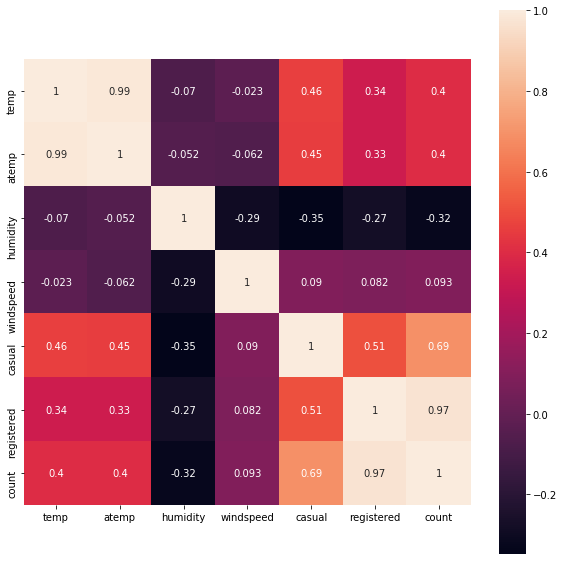

In [14]:
correlation = bike_sharing_data.corr()
mask = np.array(correlation)
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(correlation, annot = True, square = True)

From the above correlation matrix we can observe the following,
- temp and atemp are highly correlated (hence both can be considered the same). hence We can drop one of the features to avoid the colinearity during prediction
- temp (includes atemp) has got high correlation to the casual, registered and count 
- humidity and windspeed are not that correlated to count, infact humidity is negatively correlated

##### Outliers

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

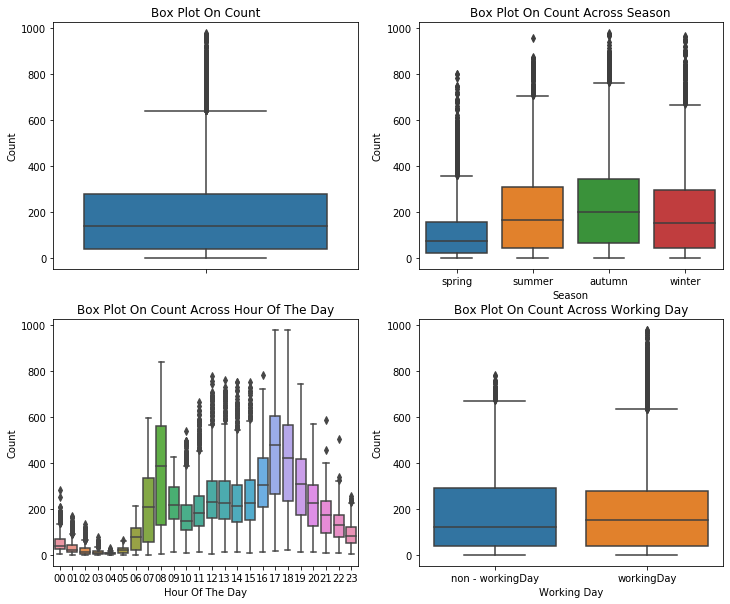

In [15]:
 season_names = ["spring", "summer", "autumn", "winter"]
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=bike_sharing_data,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_sharing_data,y="count",x="season",orient="v",ax=axes[0][1])
axes[0][1].set_xticklabels(season_names)
sns.boxplot(data=bike_sharing_data,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=bike_sharing_data,y="count",x="workingday",orient="v",ax=axes[1][1])
axes[1][1].set_xticklabels(["non - workingDay","workingDay"])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")


- "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit).
- Spring season has got relatively lower count which can be seen from dip in the box plot median
- From 3rd figure we can see that the median of count from 7am - 9am and 5pm - 7pm is large as its the before and afterworking hours where people uses bicycles for commute to and from office, schools etc.
- Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day". It is quiet visible from figure 4.

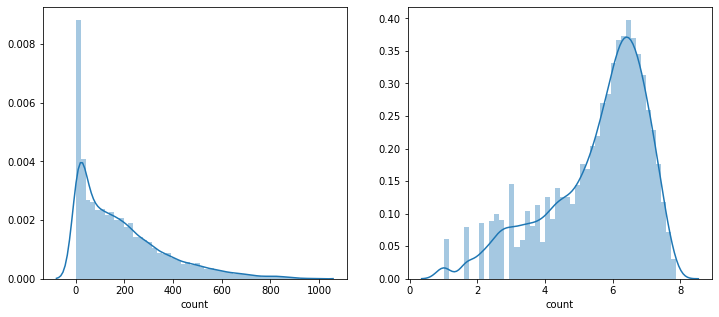

In [16]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(12,5)
sns.distplot(bike_sharing_data['count'], ax=ax1)
sns.distplot(np.log(bike_sharing_data['count'])+1, ax=ax2)

#### Data Visualizations

[Text(0, 0, 'non-holiday'), Text(0, 0, 'holiday')]

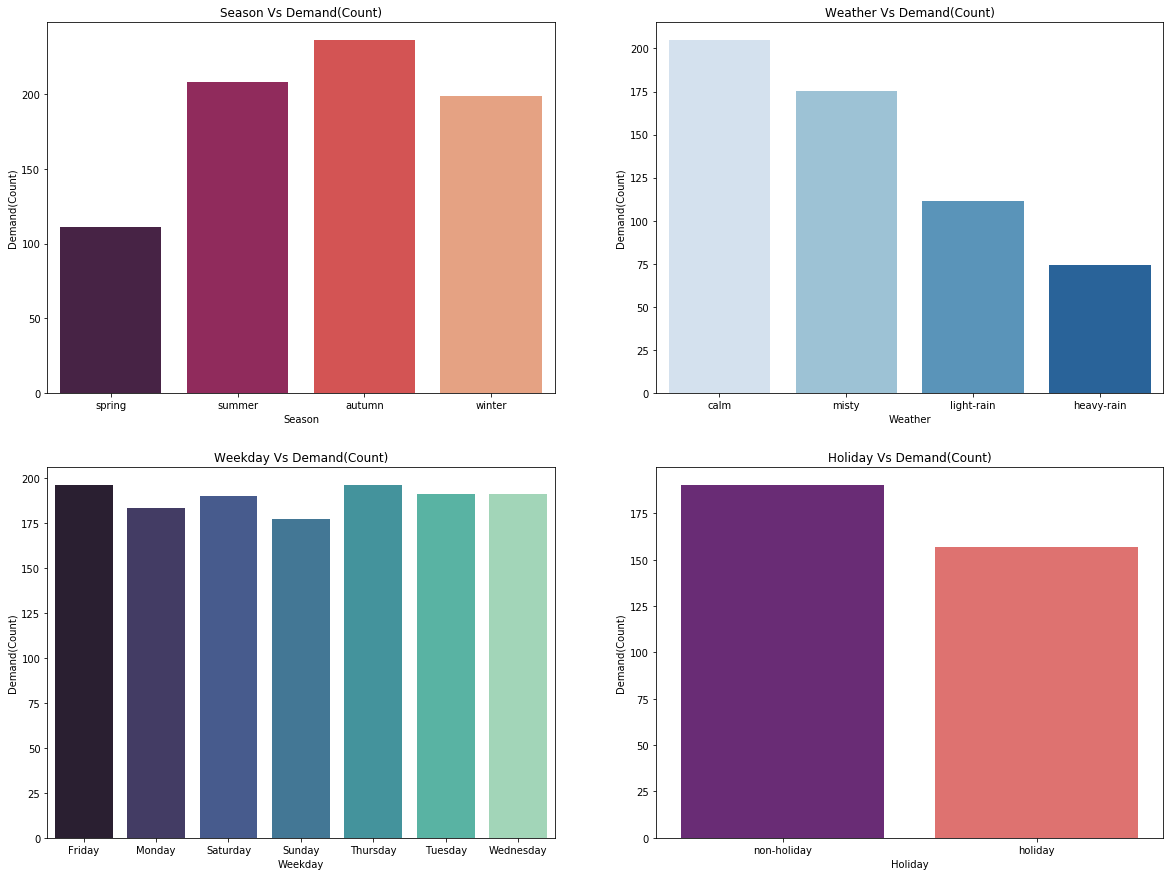

In [17]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(20, 15)
season_names = ["spring", "summer", "autumn", "winter"]
weather_names = ["calm", "misty", "light-rain", "heavy-rain"]
sns.barplot(data=bike_sharing_data, x='season',y='count',ax=axes[0][0], palette="rocket", ci = 0)
axes[0][0].set(xlabel='Season', ylabel='Demand(Count)',title = 'Season Vs Demand(Count)')
axes[0][0].set_xticklabels(season_names)
sns.barplot(data=bike_sharing_data, x='weather',y='count',ax=axes[0][1], palette="Blues", ci = 0)
axes[0][1].set(xlabel='Weather', ylabel='Demand(Count)',title = 'Weather Vs Demand(Count)')
axes[0][1].set_xticklabels(weather_names)
sns.barplot(data=bike_sharing_data, x='weekday',y='count',ax=axes[1][0], palette="mako", ci = 0)
axes[1][0].set(xlabel='Weekday', ylabel='Demand(Count)',title = 'Weekday Vs Demand(Count)')
sns.barplot(data=bike_sharing_data, x='holiday',y='count',ax=axes[1][1], palette="magma", ci = 0)
axes[1][1].set(xlabel='Holiday', ylabel='Demand(Count)',title = 'Holiday Vs Demand(Count)')
axes[1][1].set_xticklabels(["non-holiday","holiday"])

Observations made from above visualizations are these mentioned below
- As seen from box plot the count of bikes in spring is very low compared to other seasons
- the count is relatively less both in rainy and stromy weathers
- the count is slightly higher for a saturday and thursday
- the count remains almost same for a holiday and a non holiday  

[Text(0, 0.5, 'Demand(Count)'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Demand(Count) By Hour Of The Day Across User Type'),
 None]

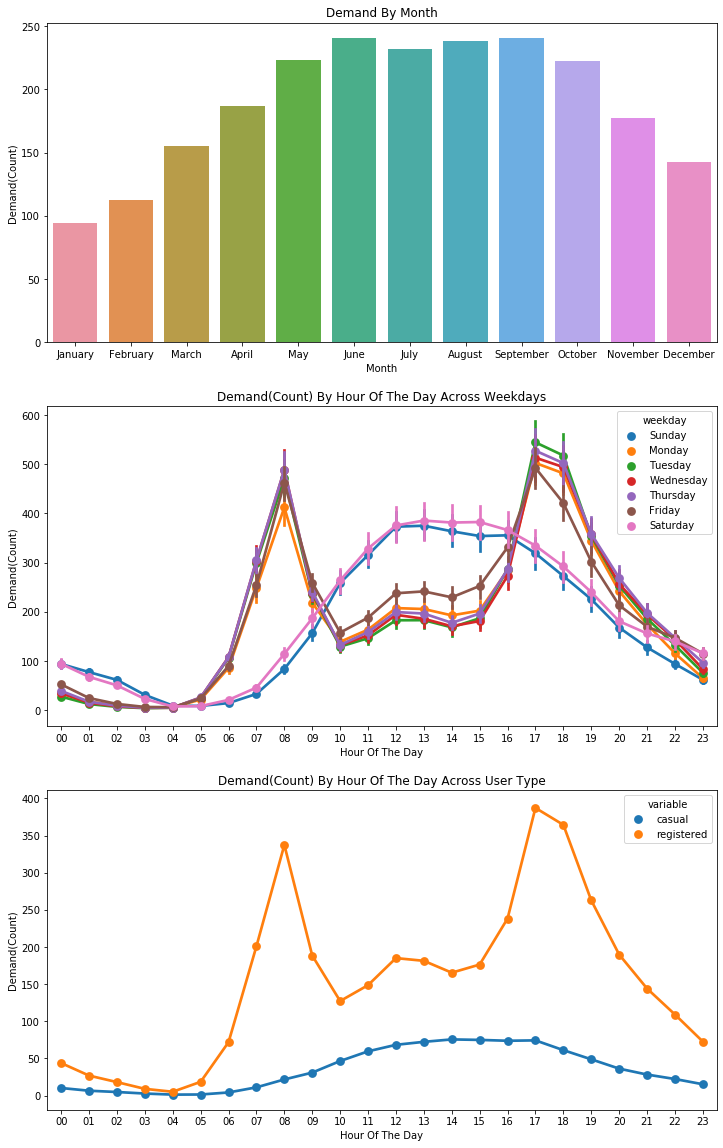

In [18]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(12,20)
hue = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
monthSort = ["January","February","March","April","May","June","July","August","September","October","November","December"]

sns.barplot(data=bike_sharing_data,x="month",y="count",ax=ax1,order=monthSort, ci = 0)
ax1.set(xlabel='Month', ylabel='Demand(Count)',title="Demand By Month")

sns.pointplot(x="hour", y="count",hue=bike_sharing_data["weekday"],hue_order=hue, data=bike_sharing_data, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Demand(Count)',title="Demand(Count) By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(bike_sharing_data[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Demand(Count)',title="Demand(Count) By Hour Of The Day Across User Type",label='big')


Above are visualizations of Count Vs (Month,Hour,Weekday,Usertype)
- The demand is plotted month wise and may to october are peak months for such bike rentals (basically fall season).
- Further these line plots gives us information of the demand every hour of the day categorised separately by weekdays and usertype
    - On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. As we mentioned earlier this can be attributed to regular school and office commuters.
    - Above pattern is not observed on "Saturday" and "Sunday".More people tend to rent bicycle between 10AM and 4PM.
    - The peak user count around 7AM-8AM and 5PM-6PM is purely contributed by registered user.


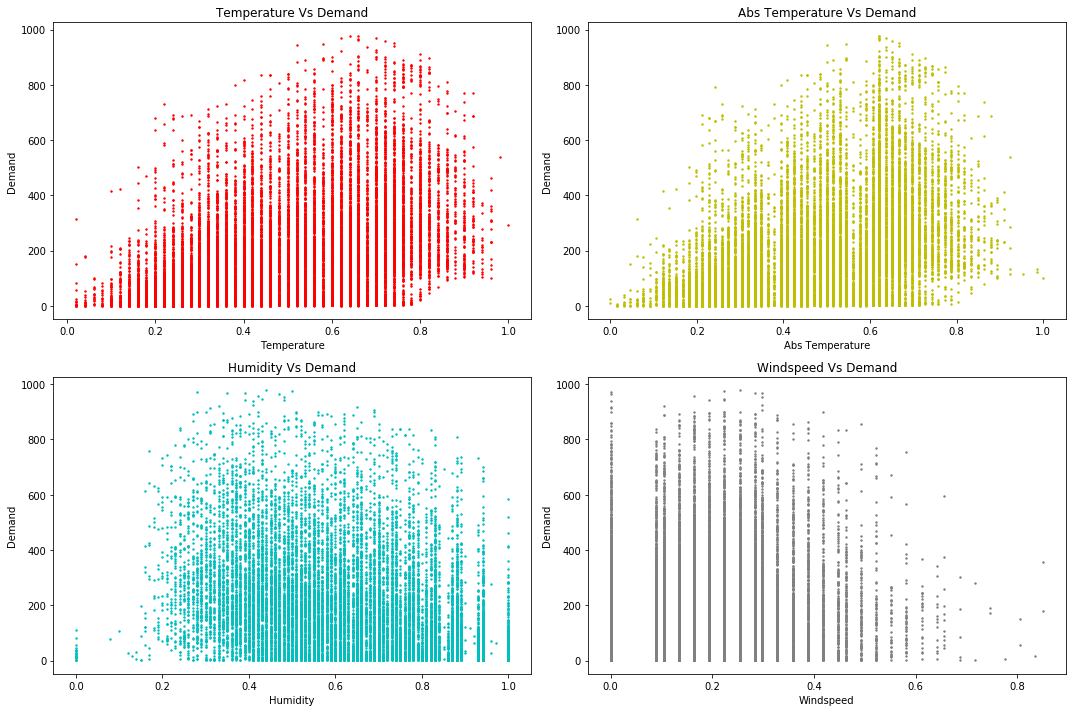

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1,)
plt.title('Temperature Vs Demand')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.scatter(bike_sharing_data['temp'],bike_sharing_data['count'],s=2,c='r')

plt.subplot(2,2,2)
plt.title('Abs Temperature Vs Demand')
plt.xlabel('Abs Temperature')
plt.ylabel('Demand')
plt.scatter(bike_sharing_data['atemp'],bike_sharing_data['count'],s=2,c='y')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.xlabel('Humidity')
plt.ylabel('Demand')
plt.scatter(bike_sharing_data['humidity'],bike_sharing_data['count'],s=2,c='c')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.xlabel('Windspeed')
plt.ylabel('Demand')
plt.scatter(bike_sharing_data['windspeed'],bike_sharing_data['count'],s=2,c='grey')

plt.tight_layout()

Its evident from above plots that temperature and Windspeed have an affect on Bike demand and also effect of temp and atemp are very similar as they both are almost the same as we had seen in corellation


## Preliminary observation 

We used certain libraries to pre process our dataset. We had to split the date column for better visualization and understanding of the dataset. Through different visualization we were able to conclude that one paricular attribute had no effect on the target variable. We found no missing data in our dataset. But we obsereved that the target variable is highly skewed. count variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit).Hence, We took log transformation on target variable after removing outlier data points. After tranformation the data looked better but still was not ideal. From the detailed understanding and visualization of the dataset, the following observations are derieved
- By plotting correlation matrix we were able to conclude Temperature and Absolute temperature plots are alsmost similar in nature
- Demand of bike depend mainly on temperature and windspeed. It also depends on the season. Warm climate attracts more users.  For Higher the windspeed the demand is very low. Most of bike in autum season than other seasons as the weather conditions are warm and pleasent
- Demand remains the same on working day and a holiday as the registered users are more on a workingday and less on a holiday but is compensated by more casual users
- All days of the week are busy. But casual users are more on saturday and sunday whereas registered users are more on weekdays
- Peak hours are
- Humidity doesnot have an effect on the bike demand



## Preprocessing of the data

In [20]:
bike_sharing_data.head()

datetime  season holiday workingday  \
0  2011-01-01 00:00:00  Spring       0          0   
1  2011-01-01 01:00:00  Spring       0          0   
2  2011-01-01 02:00:00  Spring       0          0   
3  2011-01-01 03:00:00  Spring       0          0   
4  2011-01-01 04:00:00  Spring       0          0   

                                             weather  temp   atemp  humidity  \
0  Clear + Few clouds + Partly cloudy + Partly cl...  0.24  0.2879      0.81   
1  Clear + Few clouds + Partly cloudy + Partly cl...  0.22  0.2727      0.80   
2  Clear + Few clouds + Partly cloudy + Partly cl...  0.22  0.2727      0.80   
3  Clear + Few clouds + Partly cloudy + Partly cl...  0.24  0.2879      0.75   
4  Clear + Few clouds + Partly cloudy + Partly cl...  0.24  0.2879      0.75   

   windspeed  casual  registered  count        date hour   weekday    month  
0        0.0       3          13     16  2011-01-01   00  Saturday  January  
1        0.0       8          32     40  2011-01-01   01  Saturday  January  
2        0.0       5          27     32  2011-01-01   02  Saturday  January  
3        0.0       3          10     13  2011-01-01   03  Saturday  January  
4        0.0       0           1      1  2011-01-01   04  Saturday  January

In [21]:
bike_sharing_data.shape

(17379, 16)

In [22]:
bike_sharing_data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
hour          0
weekday       0
month         0
dtype: int64

#### Feature Engineering
Now most importantly split the date and time as the time of day is expected to effect the no of bikes. for eg at office hours like early mornning or evening one would expect a greater demand of rental bikes. The year is also coded for better prediction

In [23]:
bike_sharing_data["date"] = bike_sharing_data.datetime.apply(lambda x : x.split()[0])
bike_sharing_data["hour"] = [t.hour for t in pd.DatetimeIndex(bike_sharing_data.datetime)]
bike_sharing_data['year'] = [t.year for t in pd.DatetimeIndex(bike_sharing_data.datetime)]
bike_sharing_data['year'] = bike_sharing_data['year'].map({2011:0, 2012:1})
bike_sharing_data['year'] = bike_sharing_data['year'].astype("category")

# now we can drop the datetime column
bike_sharing_data.drop('datetime',axis=1,inplace=True)

#### Removing outliers
The outliers of the target column found from the box plot in data visualization is removed

In [24]:
bike_sharing_data = bike_sharing_data[np.abs(bike_sharing_data["count"]-bike_sharing_data["count"].mean())<=(3*bike_sharing_data["count"].std())] 
bike_sharing_data.shape


(17135, 16)

#### Encoding
All the categorical variables are one hot encoded where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In [25]:
season=pd.get_dummies(bike_sharing_data['season'])
bike_sharing_data=pd.concat([bike_sharing_data,season],axis=1)
weather=pd.get_dummies(bike_sharing_data['weather'])
bike_sharing_data=pd.concat([bike_sharing_data,weather],axis=1)
weekday=pd.get_dummies(bike_sharing_data['weekday'])
bike_sharing_data=pd.concat([bike_sharing_data,weekday],axis=1)
month=pd.get_dummies(bike_sharing_data['month'])
bike_sharing_data=pd.concat([bike_sharing_data,month],axis=1)
hour=pd.get_dummies(bike_sharing_data['hour'],prefix = 'hour')
bike_sharing_data=pd.concat([bike_sharing_data,hour],axis=1)

In [26]:
bike_sharing_data.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
                ...   
hour_19          uint8
hour_20          uint8
hour_21          uint8
hour_22          uint8
hour_23          uint8
Length: 67, dtype: object

#### Dropping columns that are not related to the target variable
The column both casual and registered are dropped and other original column of the encoded variables are dropped too.

In [27]:
bike_sharing_data.drop(['casual','registered','season','weather','weekday','month','hour','date'],axis=1,inplace=True)
bike_sharing_data.shape

(17135, 59)

##### Splitting independent and dependent variables
The data is split into independent variable and target for prediction

In [28]:
bike_sharing_X = bike_sharing_data.drop('count',axis=1)

In [29]:
bike_sharing_t = np.log1p(bike_sharing_data['count'])

In [30]:
bike_sharing_X.shape

(17135, 58)

In [31]:
bike_sharing_t.shape

(17135,)

# Method

## Review

The goal we want to acheive here is to find a best fit line on all the data. So When the data is linear or our need is to have a simple solution, linear model can suggest better solutions.

$$ f(x;w) = w_1 x + w_0 $$

if we have multiple inputs for x:$$ f(x;w) = w_D x_D + .....+ w_1 x_1 + w_0 $$

where D, is the number of attributes or feature in our input data.
The main idea in finding the best fit regression like is to minimize the cost or error function, i.e. to reducde the sum of Euclidean distances between target values and our predicted values. Because the deviations are first squared, when added, there is no cancelling out between positive and negative values.

$$ E(w) =  \sum_{i=1}^{N} (f(x_i;w_i) - t_i)^2 $$

##### Least Square

Least square method seeks to minimize the sum of the squared residuals. Considering that function and trying to minimize the value of that function, we can reach our goal.

$$
w^* = \arg\min_w \sum_{i=1}{N} \Big( f(x_i; w) - t_i \Big)^2
$$

since the above equation is quadratic, we can solve it analytically by simply taking the derevative of w and equating it to zero.After solving we will get:

$$ w = (X^T X)^{-1} X^T t $$

where, X = Input matrix of N * D (N = Number of samples and D = Number of attributes)

t = Matrix of the target value

w = Matrix of the weights corresponding to each attribute

##### Least Mean Squares

In the above method to calculated the best fit line it takes into account all the data points. Such analysis becomes a problem for huge datasets. Hence, we can consider and use Sequential or Online Learning, where the weight is calculated iteratively based on the calculated values of the previous step, it makes the new prediction.

In this equation, we start with an initial guess w and change it as we read more data until it converges. Ek is the error for the k'th sample and α is a learning rate. This is called stochastic gradient descent or sequential gradient descent.

Considering the cost equation, the gradient for the sum-of-squares error for the k'th sample xk is

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

This represnts ﬁnal weight vector, LMS will be computed for each sample and this process can be repeated as many times to get the best weight.

### Explanation of the Codes

The Implementation consist of code for two main algorithms **Least Squares** and **Least Mean Squares** linear regression algorithm. 

**Base Class** : A base class **BaseModel** consit of two abstract methods 'train' and 'use' which are  defined further in different classes which are inheriting BaseModel class.

**Linear Regession** : Further, **LinearModel** class is implemented which is inheriting 'BaseModel' having its constructor in which **Weight** is defined as None. And having its own methods _check_matrix - This method checks whether the passed matrix is 2-dimentional or not and add_ones- add column of basis to the passed matrix in its parameter. Apart from its two method, this class has 2 other abstract method of its parent class BaseModel but not providing definition for that abstract methods.

**Least Square** : **LinearRegress** is the class which inherits linearModel and consist of implementation of **Least Square** regression model. The class cosnsit of two method train and use implementation apart from the reserve method(constuctor). The constructor calls the parent class constructor and initilizes the value of w. The **train** method accepts two parameters, one is 2-dimentional matrix of predictors and another is Target vector. This method is basically for calculating weights. we have called and used the super class function 'add_ones' for adding the basis to our equation. After addition of that, the model is trained using the Least Squared Formula derived above, weights are calculated. The **use** method just application of the learned model to the independent variable and prediction results are obtained which is then returned back to the method calling.

**Least Mean Square** : **LMS** is the the class where the algorithm of Least Mean square or Online Learning is implemented. This class also inherits "LinearModel" class. It has a constructor which calls the parent class constructor and apart from that its has its own member variable "self.alpha", which means when call this class, we need pass learning rate. Apart from the implementation of inherited methods this class has its own method called 'train_step'.The implementaion of **train** method here is little different from above. The train function performs the batch training for our entire data set. The entire Input and Target data are passed as a parameter to the function which in turn calls the train-step function from it, by picking one data from the bulk. The **train step** function is called for each instance of the data that is passed in the train function. From the entire bunch of data, it takes a single instance as passed by the train function and trains the model. Different weights are assigned to each instance, if the weight is null. Initially the weight for the first instance is taken as zero matrix and then for the following data it is calculated. The model is trained on the basis of the formula derived above with the minimum cost function. The **use** function adds the basis to the calculated input and weight matrix so that the linear line fits the best into our data.


## Correct Implementation

### Super Classs Definition

In [32]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [33]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = np.array(X).astype("float64")
        X = super().add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T
    
    # apply the learned model to data X
    def use(self, X):
        X = super().add_ones(X)
        Y = X.dot(self.w)
        return Y

### Least Mean Squares

In [34]:

import collections # for checking iterable instance
# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):     
        for k in range(X.shape[0]):
            self.train_step(X[k], T[k])

    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.hstack((1,x))
        x = x.reshape(1,x.shape[0])
        if self.w is None:
            self.w = np.zeros((1,x.shape[1]))
           
        y = self.w @ x[0,:]
        grad = self.alpha * (y - t[0])
        self.w = self.w - grad * x[:]
 
    # apply the current model to data X
    def use(self, X):
        X1 = super().add_ones(X)
        y =  X1 @ self.w.T
        return y

### Preliminary Test

Test to check the correct implementation of the models

In [35]:

# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


### Usage Examples

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

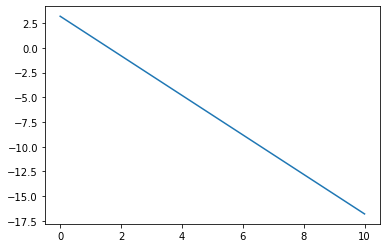

In [37]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

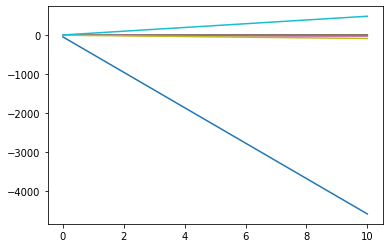

In [38]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

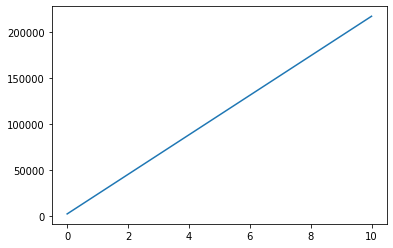

In [39]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Application of LS and LMS methods on the data, codes and the results are discussed below.

## Description

The experiment is performed using Least Squares and Least Mean Squares methods on the bike data set. The train function trains the input x and produces the desired output by generating appropriate weights. LS uses train function to train the entire data set and LMS trains step by step for each data entry.

For the given dataset, we have firstly partitioned the data for training and testing purposes. From that data we have trained our model for LS and LMS and gained the desired output.

The visualization of the predicted and actual output is shown below in the graphs. We can see the deviation from the actual values clearly in the graph. We have also seen the RMSE i.e Root mean squared error values for both of them and the error in LMS is lesser in comparision to LS, thus giving efficient results.

## Codes

### Partitioning the datasets

In [40]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    idxs = np.random.permutation(X.index)

    N = X.shape[0]
    
    X_train = np.zeros(shape=(1,X.shape[1]))
    T_train = np.zeros(shape=(1,T.shape[1]))
    
    X_test = np.zeros(shape=(1,X.shape[1]))
    T_test = np.zeros(shape=(1,T.shape[1]))
    
    j = 0
    for k, r in enumerate(ratio):
        rows = int(round(N * r))  # number of rows
        i = 0
        if k == len(ratio) -1:
            for i in range(rows):
                if(j< N):
                    X_test = np.vstack((X_test,X.iloc[idxs[j]:idxs[j]+1, :]))
                    T_test = np.vstack((T_test, T.iloc[idxs[j]:idxs[j]+1, :]))
                    j+=1
        else:
            for i in range(rows):
                X_train = np.vstack((X_train,X.iloc[idxs[j]:idxs[j]+1, :]))
                T_train = np.vstack((T_train, T.iloc[idxs[j]:idxs[j]+1, :]))
                j+=1

    X_train = np.delete(X_train, (0), axis=0)
    X_test = np.delete(X_test, (0), axis=0)
    T_train = np.delete(T_train, (0), axis=0)
    T_test = np.delete(T_test, (0), axis=0)
    return X_train, T_train, X_test, T_test

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

The above code is the partitioning code which randomly partitions the data in four different train and test sets. The train sets consist of **80%** of the data and the test set contains the rest **20%**. The **rmse** method calculates the root mean square error which takes in the test target as one parameter and predicted target as the other. 

In [41]:
X_train, t_train, X_test, t_test = partition(pd.DataFrame(bike_sharing_X), pd.DataFrame(bike_sharing_t))

In [42]:
print("Shapes of X_train{},t_train{}, X_test{}, t_test{}".format(X_train.shape, t_train.shape, X_test.shape, t_test.shape))

Shapes of X_train(13511, 58),t_train(13511, 1), X_test(3380, 58), t_test(3380, 1)


#### Least Squares

In [43]:
ls = LinearRegress()
ls.train(X_train, t_train)
y_ls = ls.use(X_test)

In [44]:
rmse(t_test, y_ls)

690580.4135943645

#### Least Mean Squares

In [45]:
lms = LMS(.0045)
lms.train(X_train, t_train)
y_lms = lms.use(X_test)

In [46]:
rmse(t_test, y_lms)

35.65302109812135

## Visualization of results

#### Visualization through Least Square

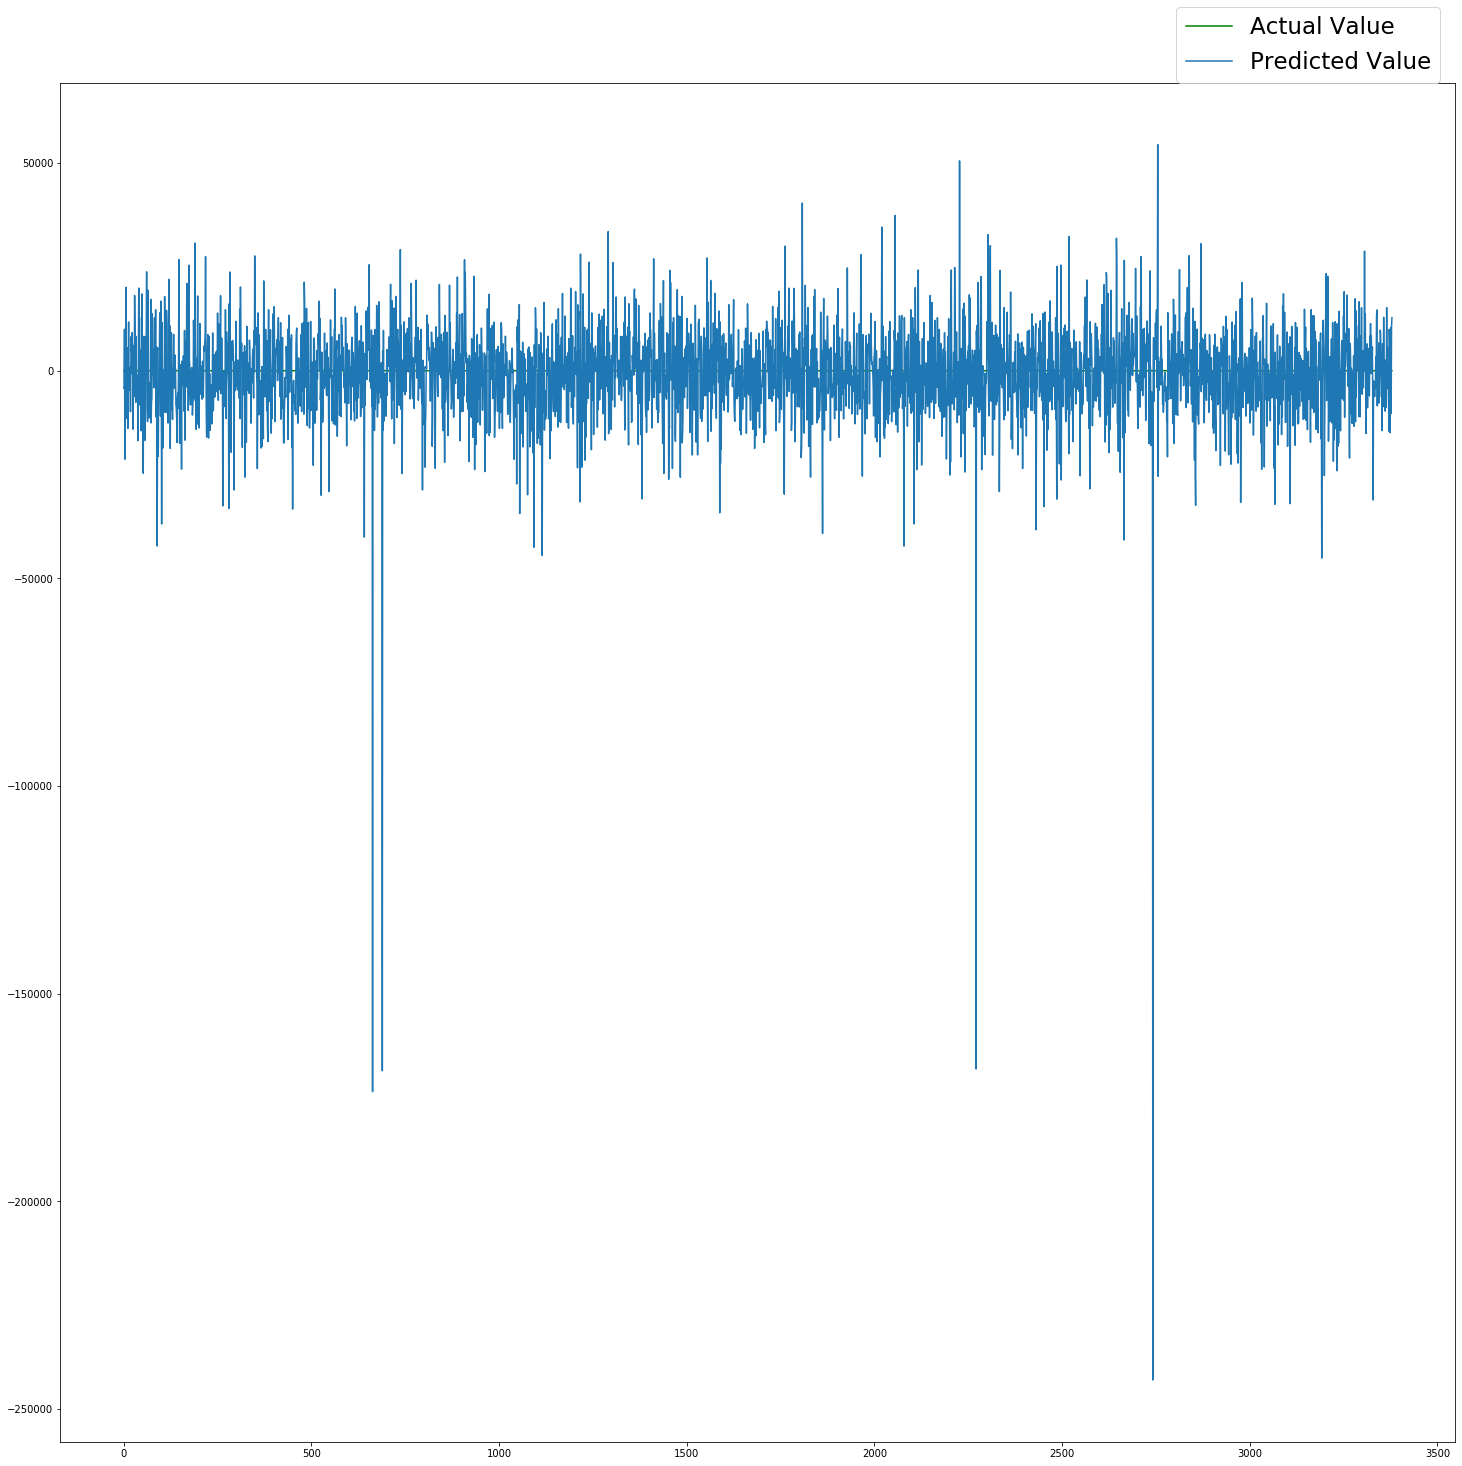

In [47]:
plt.figure(figsize=(25,25))
actual = plt.plot(t_test,'g', label='Actual Value')
predicted = plt.plot(y_ls, label='Predicted Value')
plt.legend(handles=[actual[0], predicted[0]], prop={'size': 23}, bbox_to_anchor=(0.8, 1), loc='lower left',
            borderaxespad=0.)

Green - Actual Output
Blue - Predicted Output

The above plot is between our actual values of our dependent variable(t_test) and the values predicted by our model for LS. The values in **green** color reperesents our t_test values whereas values in **blue** points to predicted values by our model. In this graph, there is huge difference between actual and predicted values. 

#### Visualization through Least Mean Square

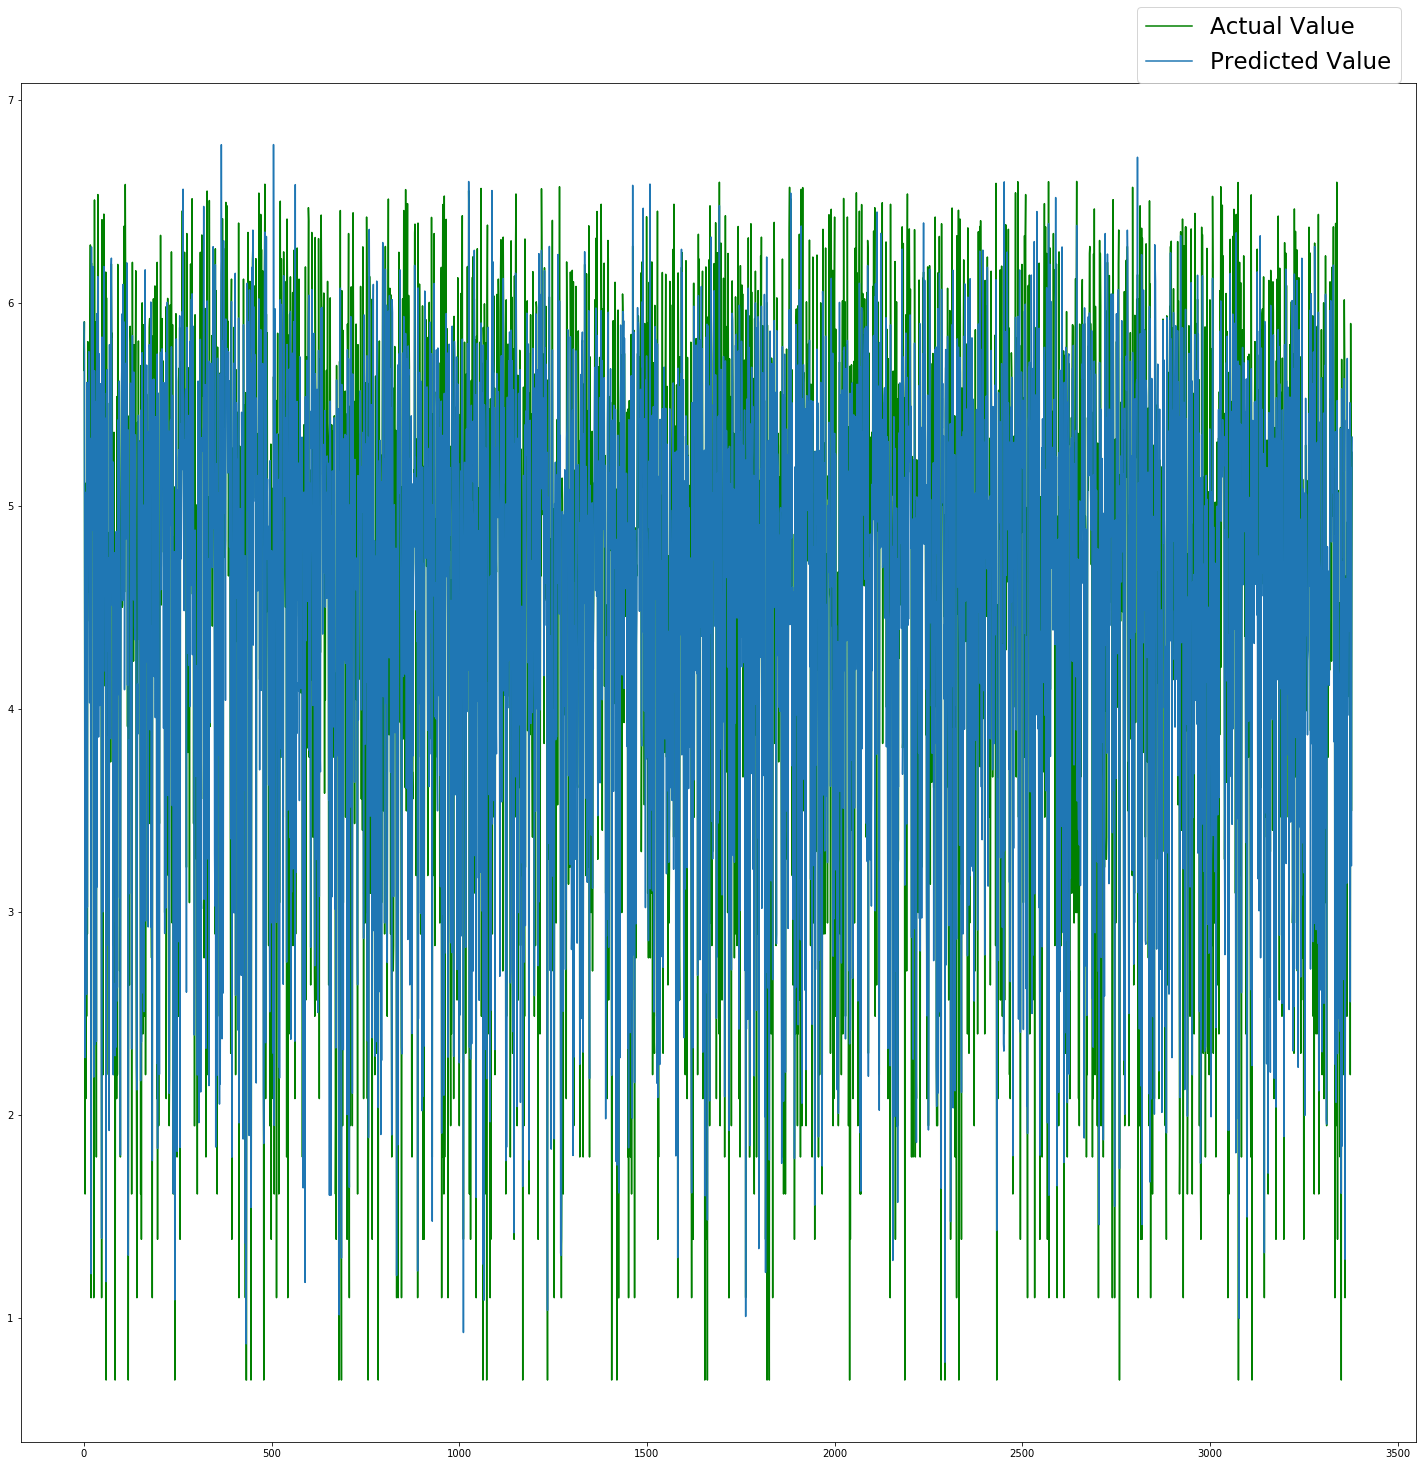

In [48]:
plt.figure(figsize=(25,25))
actual = plt.plot(t_test,'g', label='Actual Value')
predicted = plt.plot(y_lms, label='Predicted Value')
plt.legend(handles=[actual[0], predicted[0]], prop={'size': 23}, bbox_to_anchor=(0.8, 1), loc='lower left',
            borderaxespad=0.)

The above plot is between our actual values of our dependent variable(t_test) and the values predicted by our model for LMS. TThe values in **green** color reperesents our t_test values whereas values in **blue** points to predicted values by our model. In this graph, there is very less difference between actual and predicted values. Both values almost overlap each other. Hence this shows that this model peformce very well for this dataset compared to LS. The RSME value is also greatly reduced compared to LS.

#### Residual Plot

/Users/chandrachudeswaransankar/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


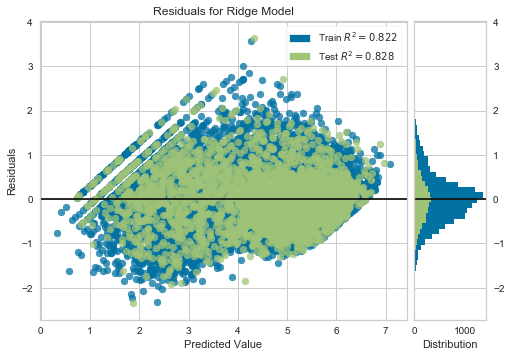

In [49]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, t_train)
visualizer.score(X_test, t_test) 
visualizer.poof()

## Analysis / comparison of algorithms

The two algorithms named Least Squares (LS) and Least Mean Squares (LMS) are used herein, linear regression model. The main difference between the two algorithms is that the Least Squares consider the entire data set for processing and generates output considering the complete data. Whereas in the least Mean Squares, it follows Online learning which is a step by step learning. In the least mean squares from the entire data set, an instance is considered at a time. From the value of the past output, it learns and makes predictions for the next output one after the other unlike LS, where entire data are taken for the calculation.

We have also seen from the algorithm that LS uses to train and use function where weight is calculated using the LS formula and in LMS we have two weights one for the current (k) and one for the next (k+1) instance. In LMS, weight is randomized at first and calculated then after. We also calculate the RSME value which gives the measure of the differences between values predicted by a model and the values observed. It gives a good idea of how our model has performed. For the above dataset, the RSME value is initially higher which might be improved by removing the unimportant feature from our datasets. 

From the plots, we can figure out that for such big data sets, the accuracy for Least mean squares is higher in comparison to least squares. The deviation from the actual value is more in the least-squares graph comparatively. Also, the root means square error (RMSE) value, which predicts the error or deviation of the predicted value from the actual value is more in LS (7523) compared to LMS (35). Thus for both the algorithms the efficiency and working variates on the way we train our data sets. We got this value after trying out several times with different Learning rates, so 'LMS' is getting the best value around .0045 as the learning rate. The accuracy declines more for a learning rate greater than or lesser than the value mentioned. 


# Additional Analysis

## Weight and Residual Analysis

Here we are trying to analyze the change in the regression model with least and most significant features of the data. The least and most significant features are identified by **correlation and EDA** analysis of the data. The below are different weight analysis. Each analysis visualizations are plotted in **different colours** for better understanding. Lets start with finding the correlation of all the other column with the target column. i.e. 'count'

In [50]:
corr = bike_sharing_data.corr() 
corr['count'].sort_values(ascending = False)

count                                                                                      1.000000
temp                                                                                       0.397211
atemp                                                                                      0.394258
hour_17                                                                                    0.253334
hour_18                                                                                    0.224190
hour_8                                                                                     0.190875
hour_16                                                                                    0.166060
hour_19                                                                                    0.165306
Fall                                                                                       0.139830
Clear + Few clouds + Partly cloudy + Partly cloudy                                         0.111664


As We see above the **highly positively correlated** variables are temp,hour_17,hour_18, hour_8, hour_16, hour_19,Fall,Clear + Few clouds + Partly cloudy + Partly cloudy and **highly negatively correlated** are humidity and spring. 


## Analysis using the most significant features 

### Most significant features derieved out of the EDA analysis

Here we calculate the regression using the most significant features from the exploratory data analysis. We found that from EDA the temp and atemp are highly correlated and the workingday, year, holiday, humidity donot affect our target variable hence only those features are removed from the dataset and prediction is based on the rest features of the independent variable set.

In [51]:
bike_sharing_X1 = bike_sharing_X.drop(['year','atemp','workingday','holiday','humidity'],axis=1)
bike_sharing_t1 = bike_sharing_t.copy()

In [52]:
X_train1, t_train1, X_test1, t_test1 = partition(pd.DataFrame(bike_sharing_X1), pd.DataFrame(bike_sharing_t1))

In [53]:
print("Shapes of X_train{},t_train{}, X_test{}, t_test{}".format(X_train1.shape, t_train1.shape, X_test1.shape, t_test1.shape))

Shapes of X_train(13515, 53),t_train(13515, 1), X_test(3376, 53), t_test(3376, 1)


#### Least Squares

In [54]:
ls1 = LinearRegress()
ls1.train(X_train1, t_train1)
y_ls1 = ls1.use(X_test1)

In [55]:
rmse(t_test1, y_ls1)

27858.362751618213

#### Least Mean Squares

In [56]:
lms1 = LMS(.004)
lms1.train(X_train1, t_train1)
y_lms1 = lms1.use(X_test1)

In [57]:
rmse(t_test1, y_lms1)

37.733869303090536

#### Visualization through Least Square

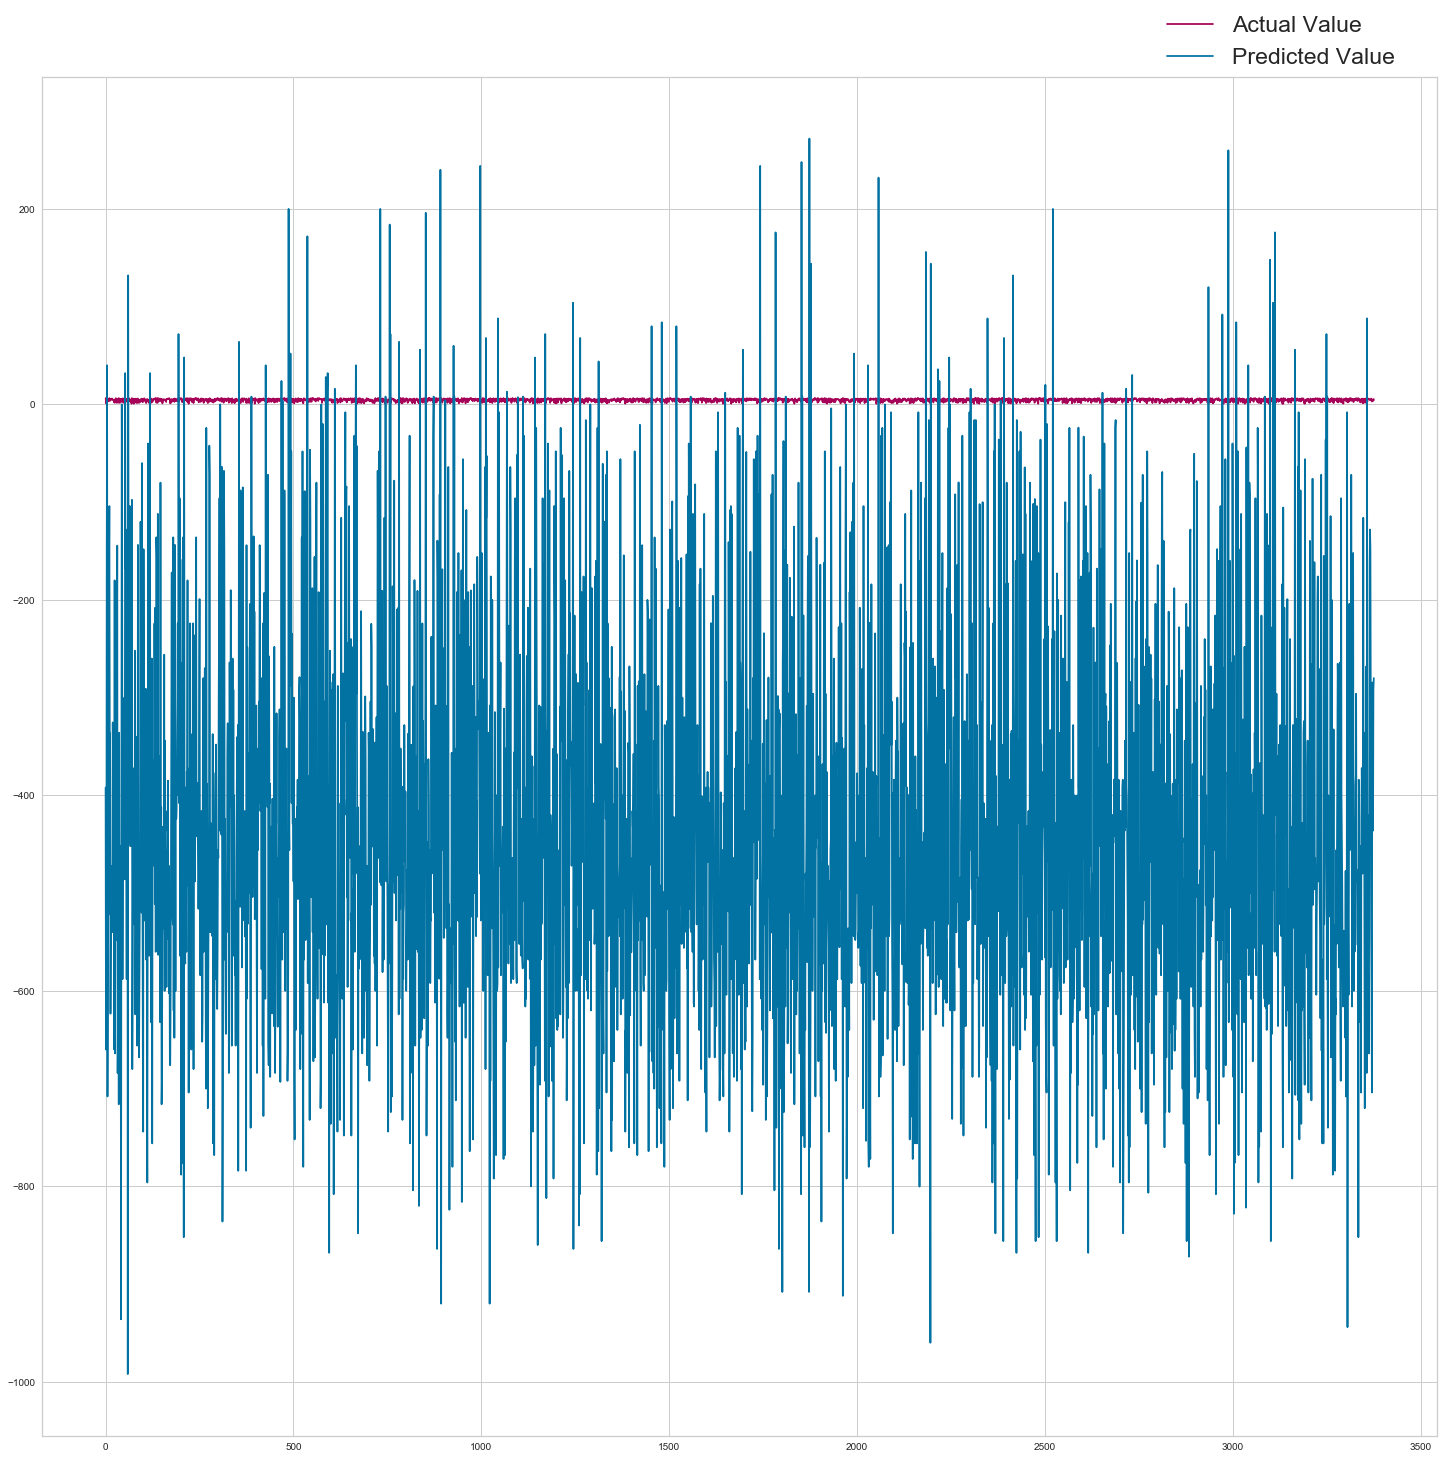

In [58]:
plt.figure(figsize=(25,25))
actual = plt.plot(t_test1,'m', label='Actual Value')
predicted = plt.plot(y_ls1,'b', label='Predicted Value')
plt.legend(handles=[actual[0], predicted[0]], prop={'size': 23}, bbox_to_anchor=(0.8, 1), loc='lower left',
            borderaxespad=0.)

The above plot is between our actual values of our dependent variable(t_test) and the values predicted by our model for LS. The values in magentha color reperesents our t_test values whereas values in blue points to predicted values by our model. In this graph, eventhough there is huge difference between actual and predicted values, it is much better compared to th previos LS model. There is more improvement in the RMSE value too. 

#### Visualization through Least Mean Square

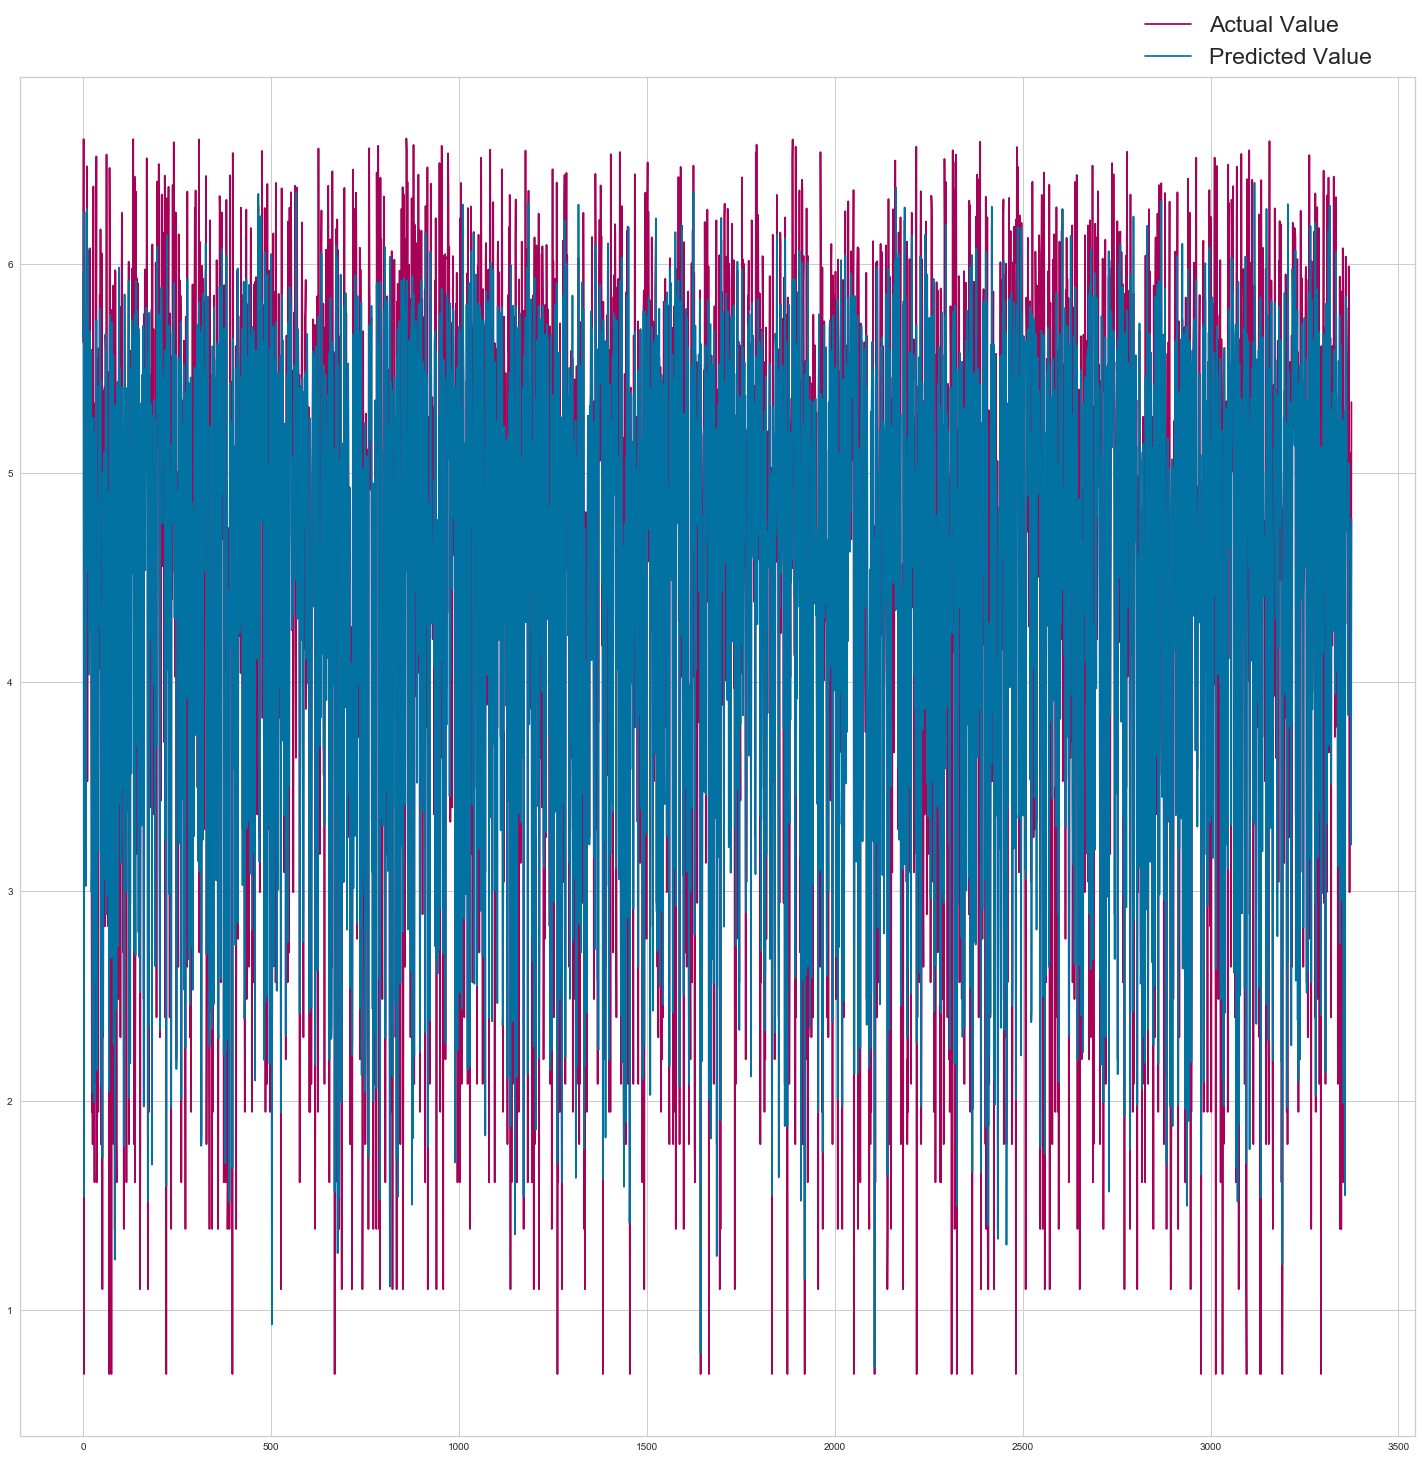

In [59]:
plt.figure(figsize=(25,25))
actual = plt.plot(t_test1,'m', label='Actual Value')
predicted = plt.plot(y_lms1, 'b', label='Predicted Value')
plt.legend(handles=[actual[0], predicted[0]], prop={'size': 23}, bbox_to_anchor=(0.8, 1), loc='lower left',
            borderaxespad=0.)

The values in **megenta** color reperesents our t_test values whereas values in **blue** points to predicted values by our model. In this graph, there is very less difference between actual and predicted values. Both values almost overlap each other. Hence this shows that this model peformce very well for this dataset compared to LS. But this is slightly less in performance compared to the previous LMS calculation unlike LS which shows improvement.

#### Residual Plot

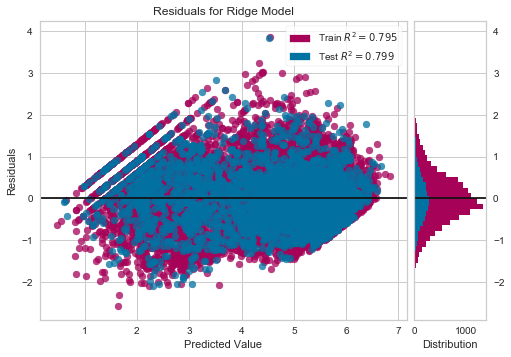

In [60]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge, train_color='m', test_color='b')

visualizer.fit(X_train1, t_train1)
visualizer.score(X_test1, t_test1) 
visualizer.poof()

### Highly positively correlated feature 'temp' 

The **temp** is the most significant feature with respect to the correlation analysis. It is highly correlated to the target variable 'count'.


In [61]:
bike_sharing_x2 = bike_sharing_data[['temp']]
bike_sharing_t2 = bike_sharing_t.copy()

In [62]:
X_train2, t_train2, X_test2, t_test2 = partition(pd.DataFrame(bike_sharing_x2), pd.DataFrame(bike_sharing_t2))

In [63]:
print("Shapes of X_train{},t_train{}, X_test{}, t_test{}".format(X_train2.shape, t_train2.shape, X_test2.shape, t_test2.shape))

Shapes of X_train(13503, 1),t_train(13503, 1), X_test(3388, 1), t_test(3388, 1)


#### Least Squares

In [64]:
ls2 = LinearRegress()
ls2.train(X_train2, t_train2)
y_ls2 = ls2.use(X_test2)

In [65]:
rmse(t_test2, y_ls2)

75.17347068505318

#### Least Mean Squares

In [66]:
lms2 = LMS(.003999)
lms2.train(X_train2, t_train2)
y_lms2 = lms2.use(X_test2)

In [67]:
rmse(t_test2, y_lms2)

75.24184277793846

#### Visualization through Least Square

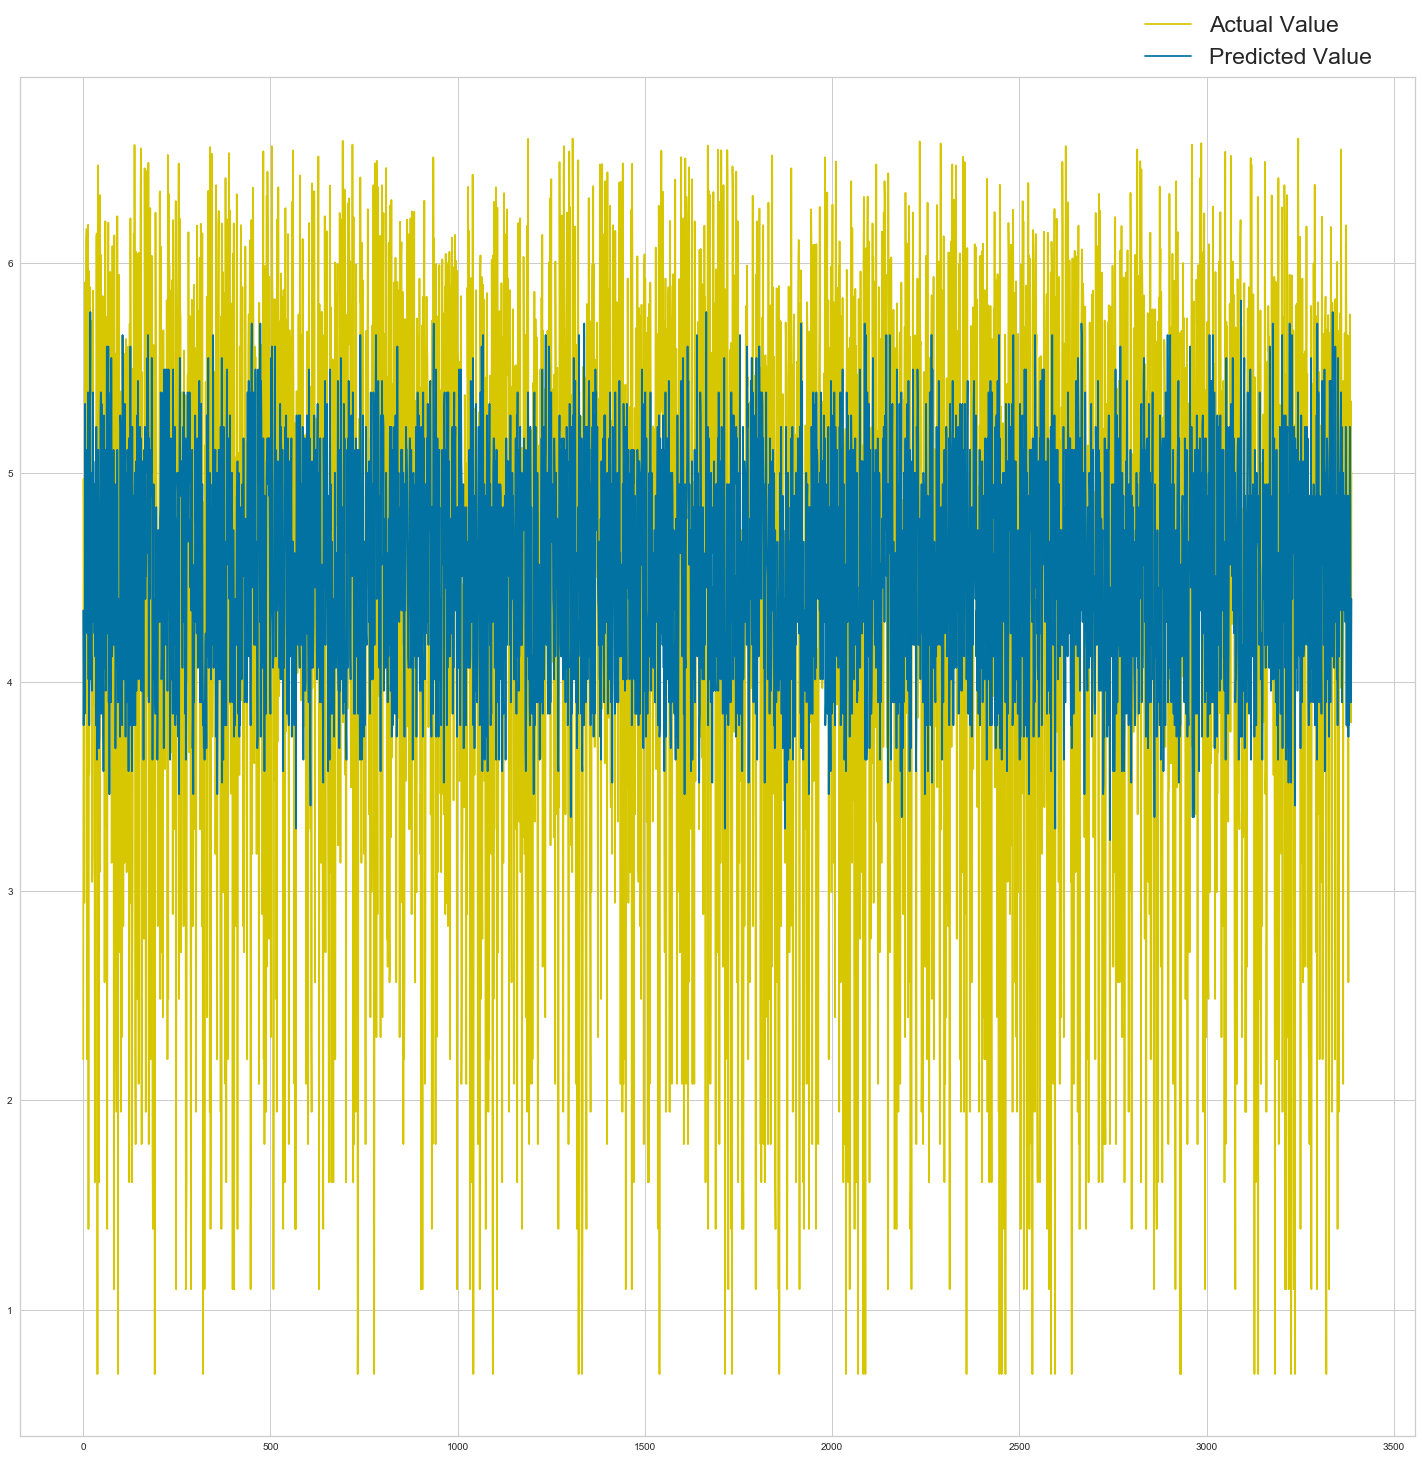

In [68]:
plt.figure(figsize=(25,25))
actual = plt.plot(t_test2,'y', label='Actual Value')
predicted = plt.plot(y_ls2, label='Predicted Value')
plt.legend(handles=[actual[0], predicted[0]], prop={'size': 23}, bbox_to_anchor=(0.8, 1), loc='lower left',
            borderaxespad=0.)

While the trend gets opposite in the case of LS. The accuracy of the model gets improved from the earlier one as the new RMSE value (76.30798355720253) is smaller than that of earlier two(2834.878840218479). The conclusion obtained from this is for ordinary least squares it is important to consider only limited highly dependent variables for prediction.

#### Visualization through Least Mean Square

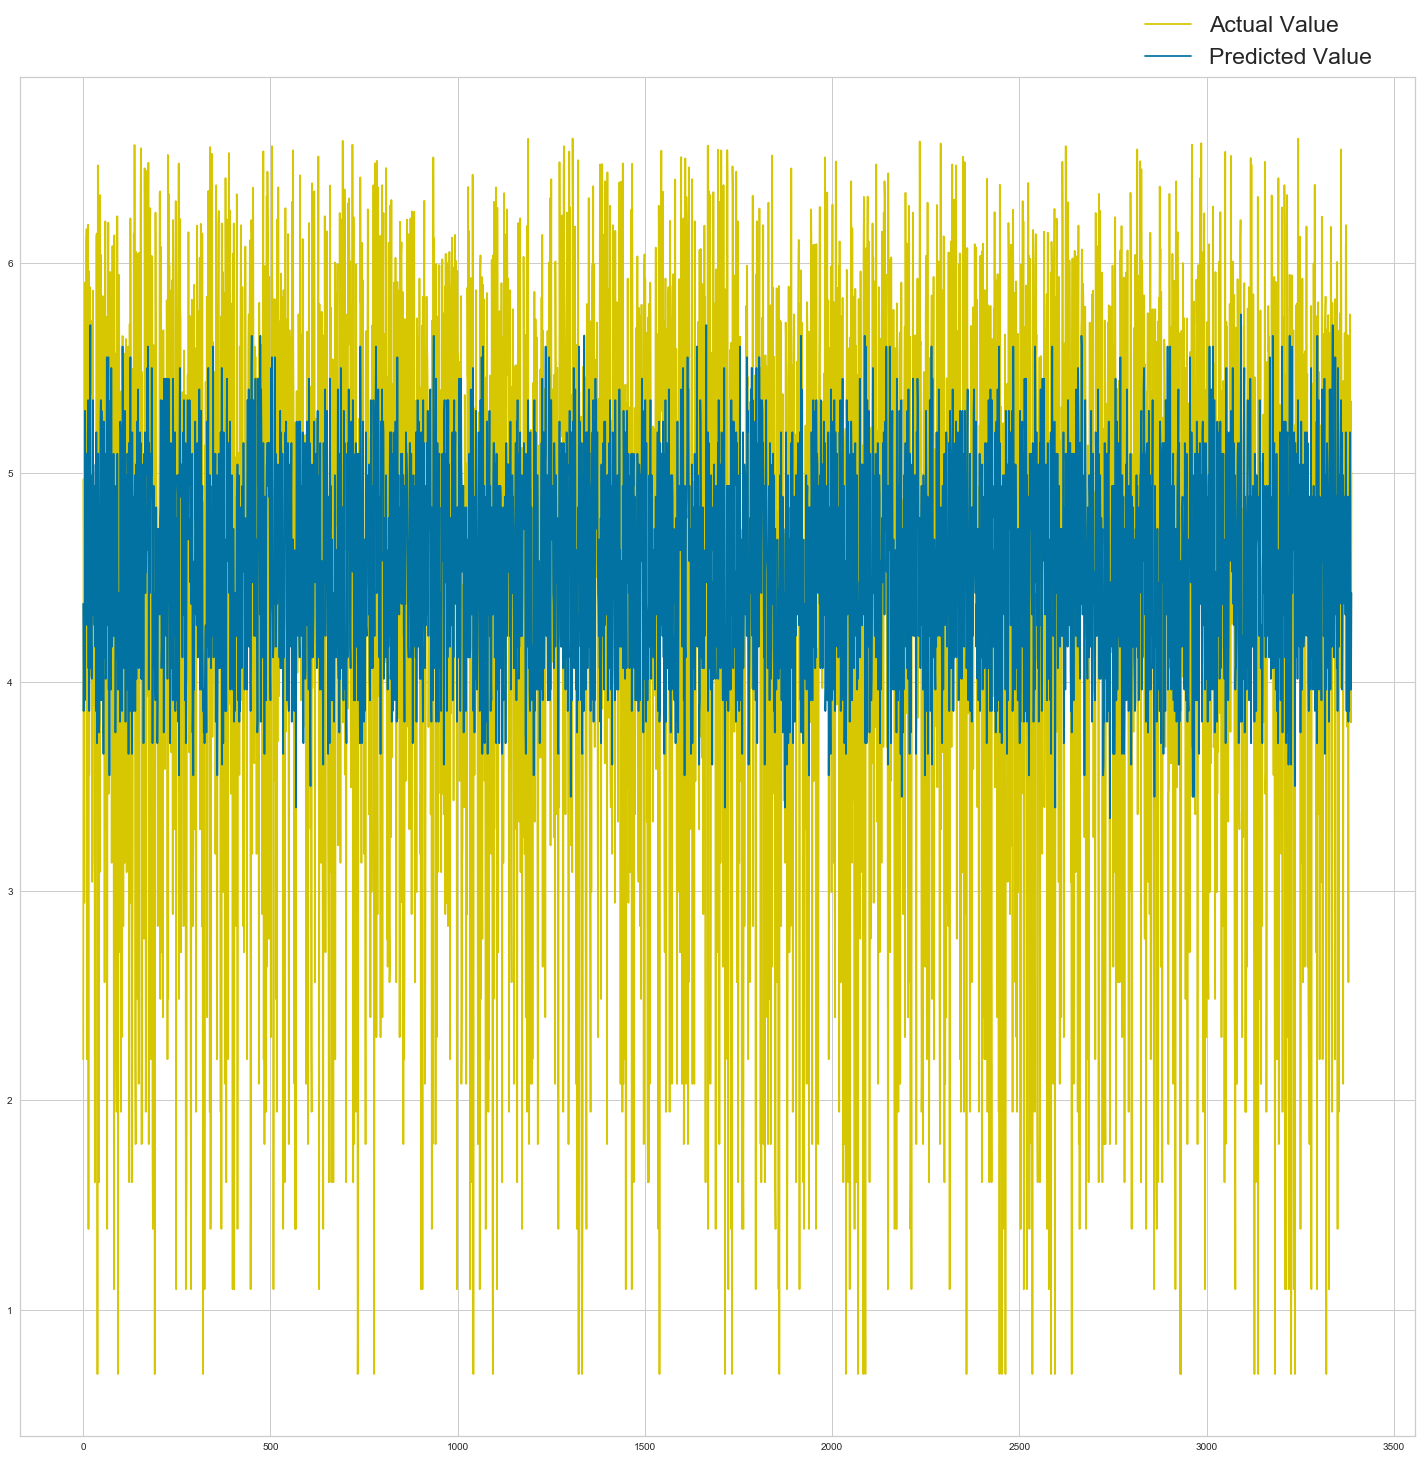

In [69]:
plt.figure(figsize=(25,25))
actual = plt.plot(t_test2,'y', label='Actual Value')
predicted = plt.plot(y_lms2, label='Predicted Value')
plt.legend(handles=[actual[0], predicted[0]], prop={'size': 23}, bbox_to_anchor=(0.8, 1), loc='lower left',
            borderaxespad=0.)

Even after removing all other attributes and keeing the most correlated one does not improve our model accuracy. It even gets more worse. Even RMSE values upadted(76) is greater than that of previous one(35). This can also be visualized from plot above in which difference between actual and predicted value is gretaer than that of previous one and for some value its too large than the actual ones.

#### Residual Plot

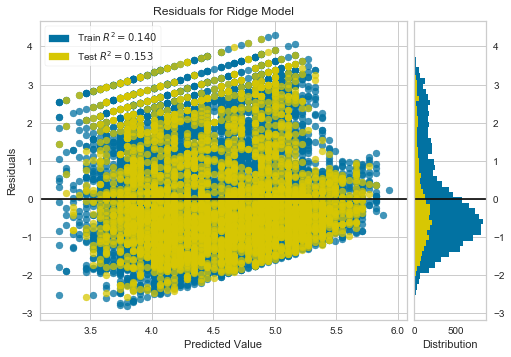

In [70]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge, train_color='b', test_color='y')

visualizer.fit(X_train2, t_train2)
visualizer.score(X_test2, t_test2) 
visualizer.poof()

### Highly negatively correlated feature 'humidity'

Analysis with only the most negatively correlated feature 'Humidity'. This column is also defiend to be not related to the target column from EDA analysis.

In [71]:
bike_sharing_x3 = bike_sharing_data['humidity']
bike_sharing_t3 = bike_sharing_t.copy()

In [72]:
X_train3, t_train3, X_test3, t_test3 = partition(pd.DataFrame(bike_sharing_x3), pd.DataFrame(bike_sharing_t3))

In [73]:
print("Shapes of X_train{},t_train{}, X_test{}, t_test{}".format(X_train3.shape, t_train3.shape, X_test3.shape, t_test3.shape))

Shapes of X_train(13499, 1),t_train(13499, 1), X_test(3392, 1), t_test(3392, 1)


#### Least Squares

In [74]:
ls3 = LinearRegress()
ls3.train(X_train3, t_train3)
y_ls3 = ls3.use(X_test3)

In [75]:
rmse(t_test3, y_ls3)

76.57680719647887

#### Least Mean Squares

In [76]:
lms3 = LMS(.04)
lms3.train(X_train3, t_train3)
y_lms3 = lms3.use(X_test3)

In [77]:
rmse(t_test3, y_lms3)

77.49167148590784

#### Visualization through Least Square

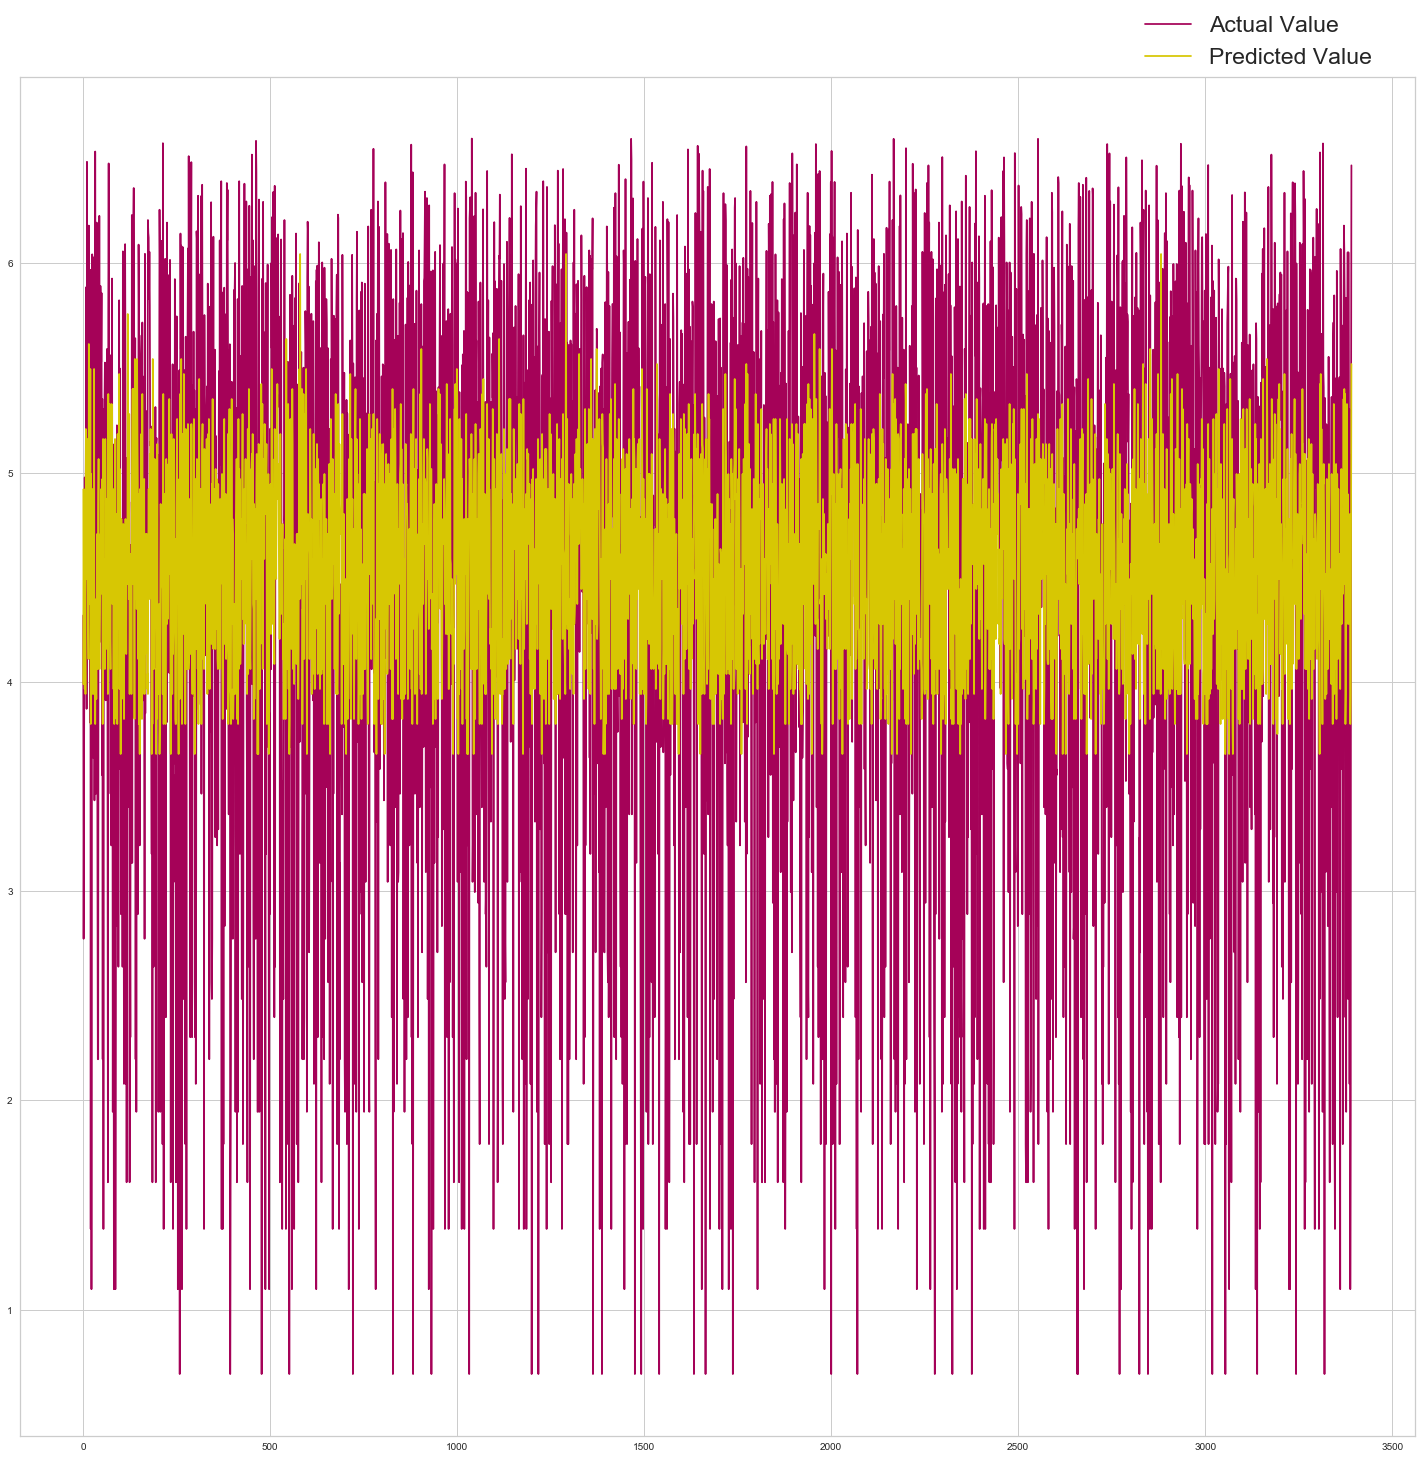

In [78]:
plt.figure(figsize=(25,25))
actual = plt.plot(t_test3,'m', label='Actual Value')
predicted = plt.plot(y_ls3,'y',label='Predicted Value')
plt.legend(handles=[actual[0], predicted[0]], prop={'size': 23}, bbox_to_anchor=(0.8, 1), loc='lower left',
            borderaxespad=0.)

Here we can see this is more similar to the prediction with highly correlated value. Even there is not much of difference in the RSME values.

#### Visualization through Least Mean Square

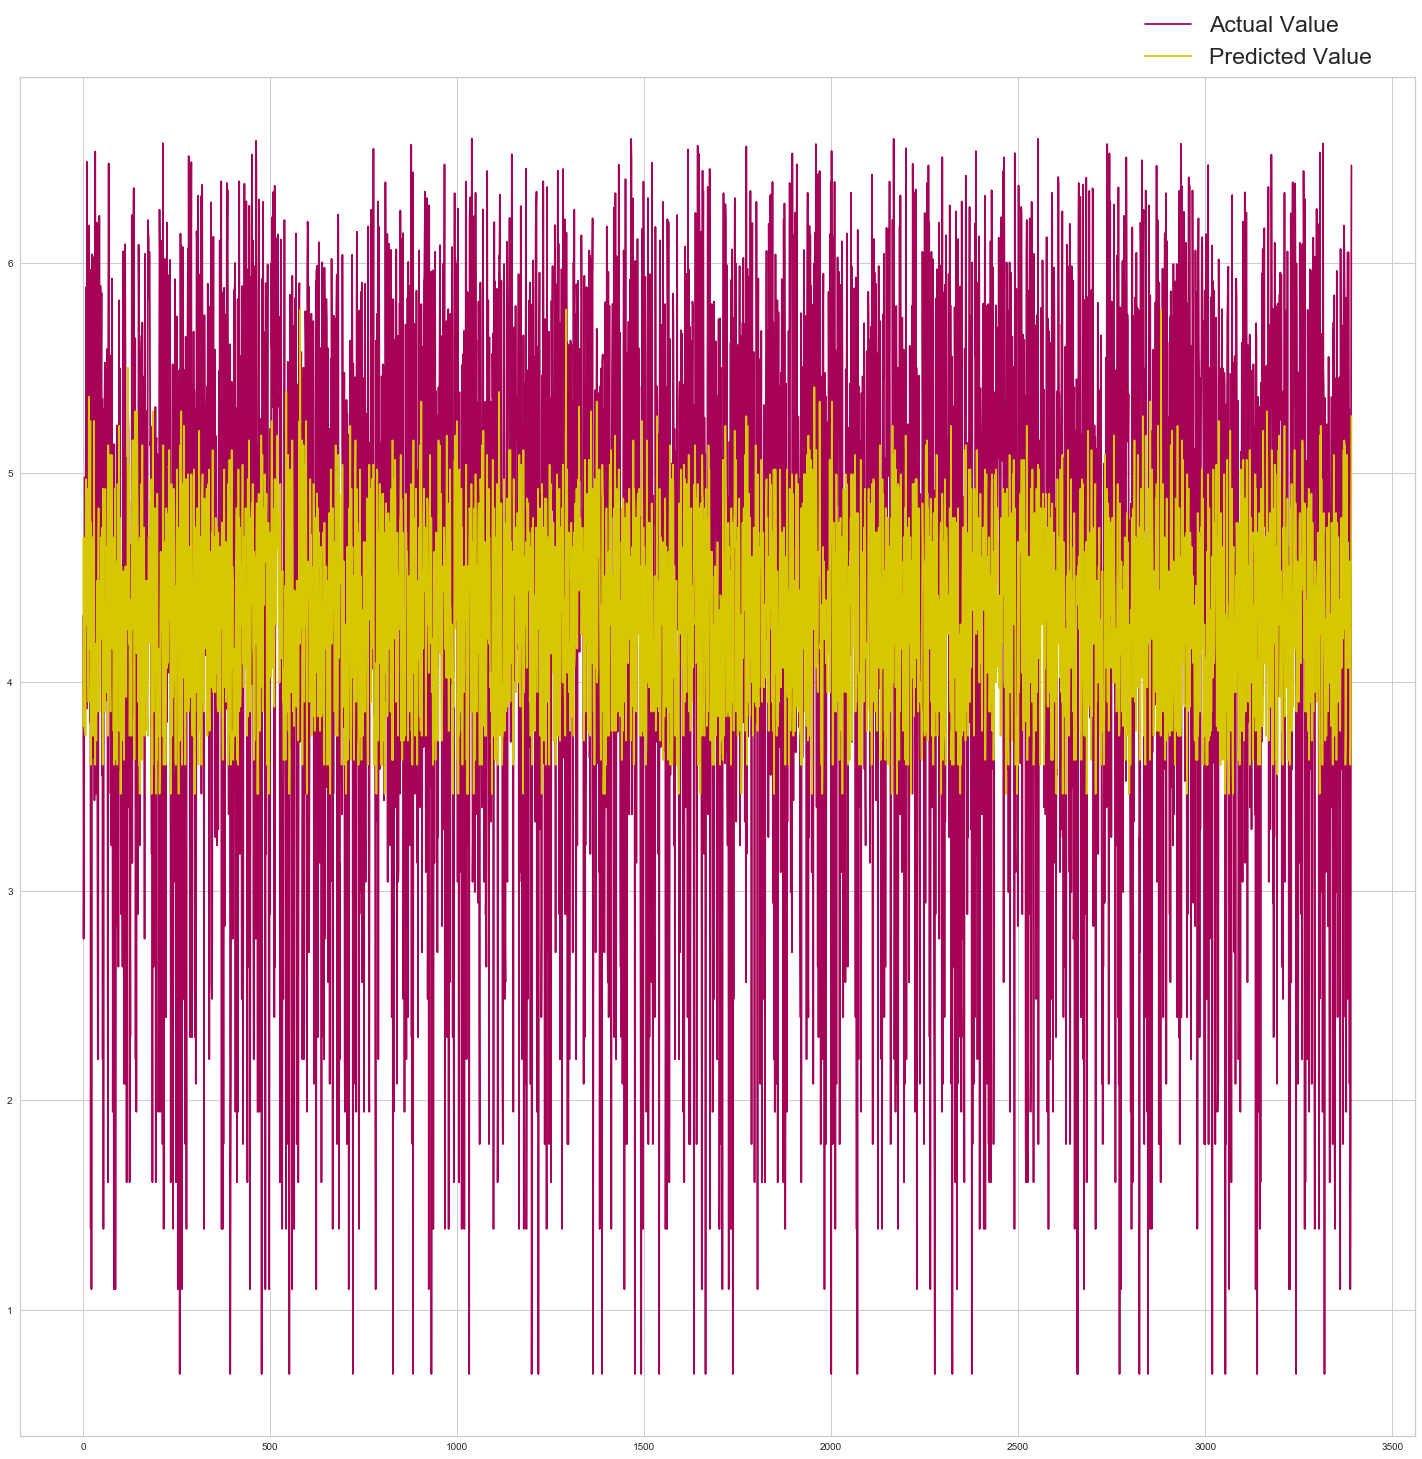

In [79]:
plt.figure(figsize=(25,25))
actual = plt.plot(t_test3,'m', label='Actual Value')
predicted = plt.plot(y_lms3,'y', label='Predicted Value')
plt.legend(handles=[actual[0], predicted[0]], prop={'size': 23}, bbox_to_anchor=(0.8, 1), loc='lower left',
            borderaxespad=0.)

Being a column that is not associated with the target variable gives values even worse than the highly corelated column. We expected to get a very high RSME value since the column is distinct and donot help in prediction.

#### Residual Plot

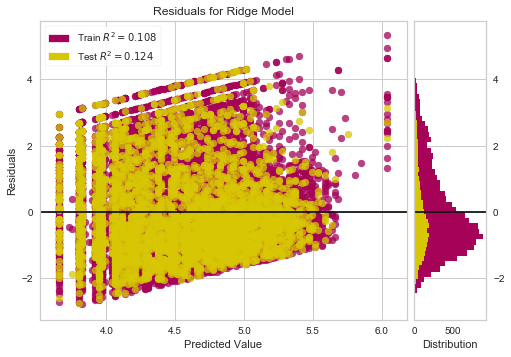

In [80]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge, train_color='m', test_color='y')

visualizer.fit(X_train3, t_train3)
visualizer.score(X_test3, t_test3) 
visualizer.poof()

### Analysis with Least Significant Features
From the correlation matrix least significant features are fetched. 

In [81]:
bike_sharing_X4 = bike_sharing_data[['windspeed', 'hour_13', 'June', 'hour_12', 'hour_15', 'hour_14', 'Summer', 'August', 'July', 'September', 'May', 'hour_20', 'hour_9', 'hour_7', 'October', 'hour_11', 'Winter', 'Saturday', 'Friday', 'April', 'Thursday', 'November', 'Tuesday', 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog', 'hour_10', 'Sunday', 'hour_21', 'Wednesday', 'Monday', 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'March', 'hour_22', 'December']]
bike_sharing_t4 = bike_sharing_t.copy()

In [82]:
X_train3, t_train3, X_test3, t_test3 = partition(pd.DataFrame(bike_sharing_x3), pd.DataFrame(bike_sharing_t3))

In [83]:
print("Shapes of X_train{},t_train{}, X_test{}, t_test{}".format(X_train3.shape, t_train3.shape, X_test3.shape, t_test3.shape))

Shapes of X_train(13518, 1),t_train(13518, 1), X_test(3373, 1), t_test(3373, 1)


#### Least Squares

In [84]:
ls3 = LinearRegress()
ls3.train(X_train3, t_train3)
y_ls3 = ls3.use(X_test3)

In [85]:
rmse(t_test3, y_ls3)

76.14888042545877

#### Least Mean Squares

In [86]:
lms3 = LMS(.04)
lms3.train(X_train3, t_train3)
y_lms3 = lms3.use(X_test3)

In [87]:
rmse(t_test3, y_lms3)

78.79830114226577

#### Visualization through Least Square

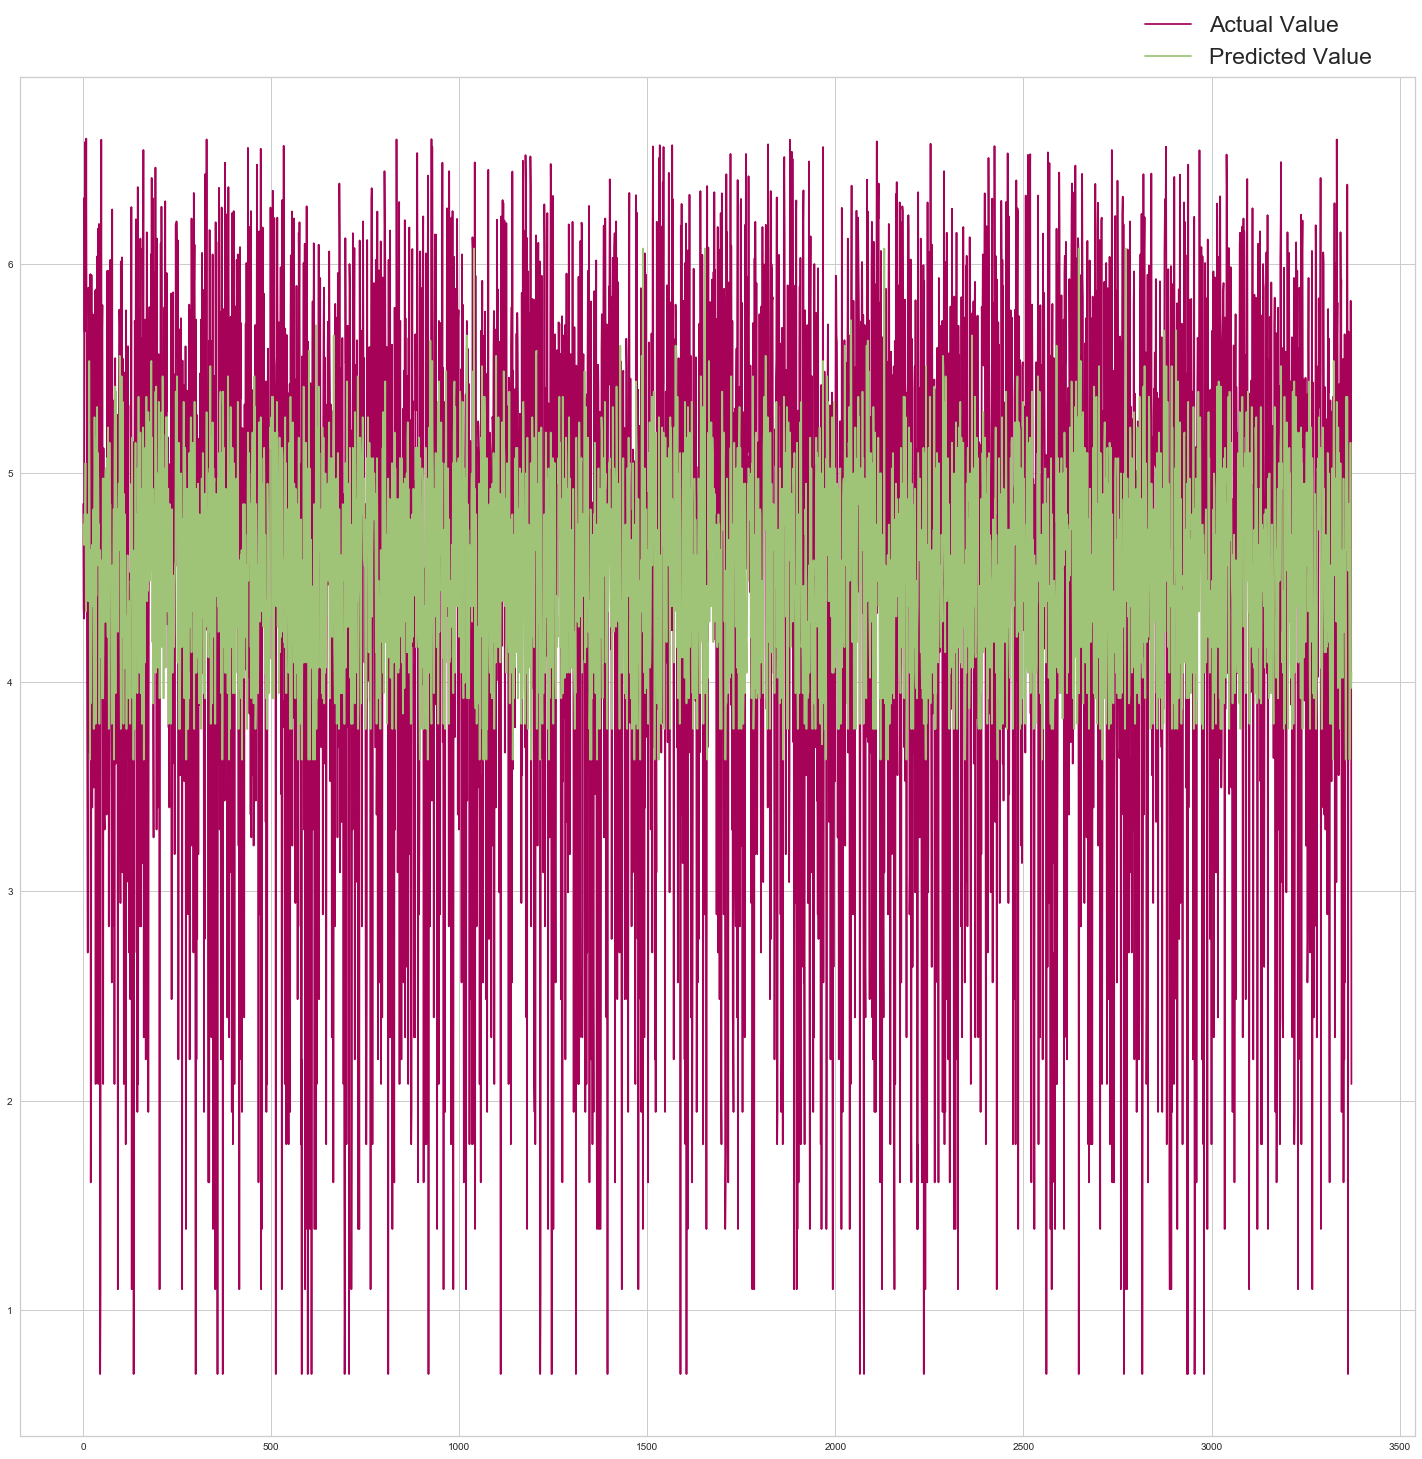

In [88]:
plt.figure(figsize=(25,25))
actual = plt.plot(t_test3,'m',label='Actual Value')
predicted = plt.plot(y_ls3,'g', label='Predicted Value')
plt.legend(handles=[actual[0], predicted[0]], prop={'size': 23}, bbox_to_anchor=(0.8, 1), loc='lower left',
            borderaxespad=0.)

Here we can see this is more similar to the prediction with highly correlated value. Even there is not much of difference in the RSME values.

#### Visualization through Least Mean Square

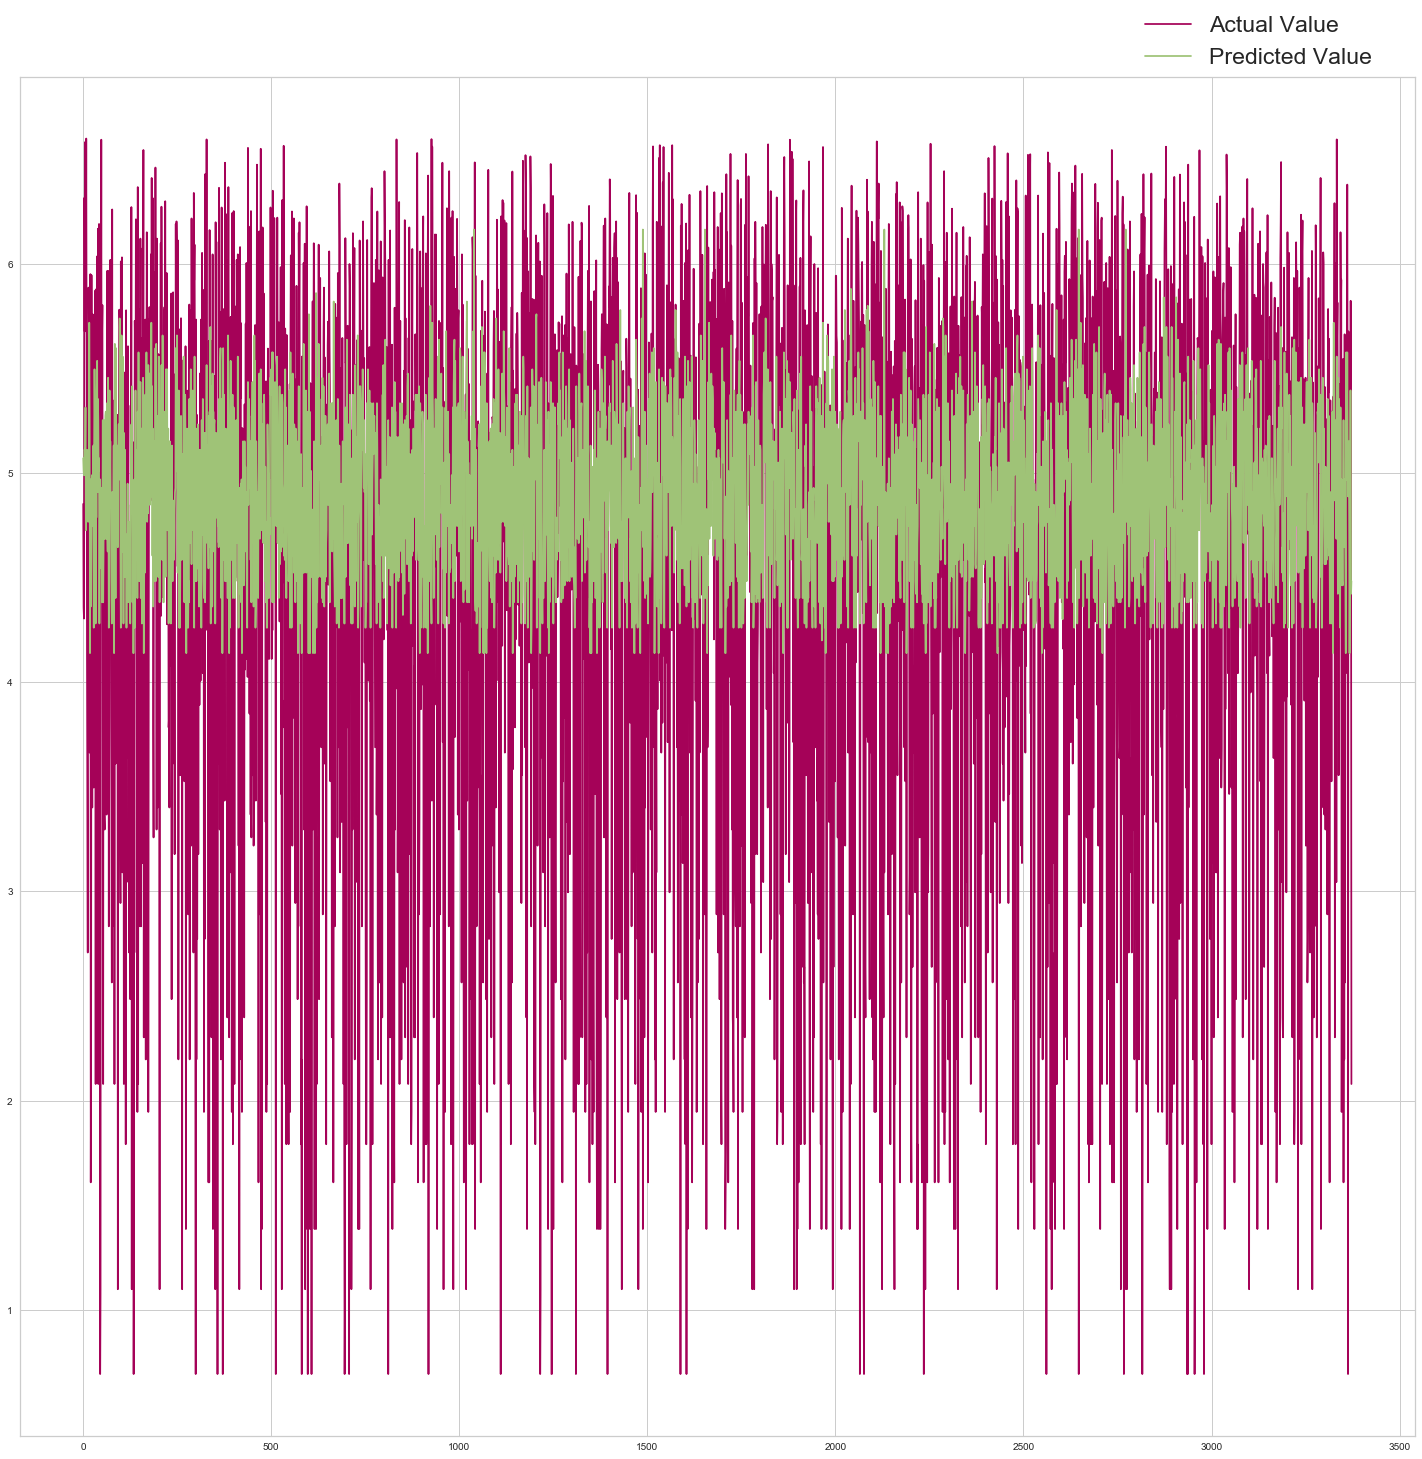

In [89]:
plt.figure(figsize=(25,25))
actual = plt.plot(t_test3,'m', label='Actual Value')
predicted = plt.plot(y_lms3,'g', label='Predicted Value')
plt.legend(handles=[actual[0], predicted[0]], prop={'size': 23}, bbox_to_anchor=(0.8, 1), loc='lower left',
            borderaxespad=0.)

For the Least Mean Square this has opposite performance than what is expected. Being a columns that are not associated with the target variable still were able to give values equal to the highly correlated column. 
Eventhough these produced a less output compared to considering all the columns.

#### Residual Plot

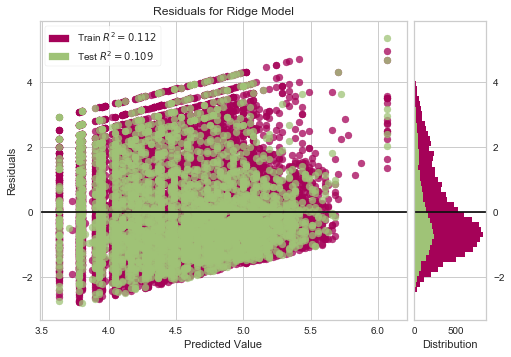

In [90]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge, train_color='m', test_color='g')

visualizer.fit(X_train3, t_train3)
visualizer.score(X_test3, t_test3) 
visualizer.poof()

# Conclusion

The Assignment for linear Regression had so many learnings from it. The first was a basic visualization of data and some preprocessing the data. Through the EDA analysis, I learned how important it is to clean, process, and sample the data for accurate prediction. It had also made a clear understanding of how linear regression models work in supervised learning. Apart from the theoretical knowledge on how the algorithms and formulas are designed, a proper implementation knowledge of the models has been gained. Choosing the appropriate model for appropriate data set has been considered like for large data sets LMS is effective as it considers Online learning.

Least Squares and Least Mean squares are the two methods that show proper usage of fitting a linear line to our data so that our predicted output and the actual output are close enough. Both use a cost function that is calculated by taking the Euclidean distance between predicted and actual value. This cost function will minimize the distance of the line points from the actual points and thus give us the better output. But both algorithms differ in the way their cost function is calculated. Least Square takes and processes the data in one go while LMS process the data sequentially, which is called Online Learning. LMS just iterate over the number of samples and calculates the weight vector each time and in the end, it calculates the predicted value on the best weights we get through the process.

As the first step, we started to visualize and understand the data without any previous assumptions. We analyzed every attribute of the dataset. A boxplot was plotted to identify the outliers. A feature engineering is needed to split the DateTime column of the dataset. We then removed the outliers, created one-hot encoding for the categorical variables of the data.  We then split our datasets into training and test sets. We feed our algorithm with training sets and further analyze its prediction on the test set with actual values. For the accuracy, we calculated Root Mean Square values to check how accurate our model is (Lesser the value, the better our model). Finally, we plot the predicted value with the actual value and observed how much is the difference between our actual and predicted values.
We also learned about the efficiency of both algorithms by comparing the RMSE values and using different methods to train and test our data set.

Initially, we applied our regression algorithm to the complete dataset, then we analyzed our model on the Most significant column and the least significant column obtained through correlation analysis with the target variable.
Consideration of only the most significant column and the least significant column contains slight variation but the overall predictions is almost the same.In comparision with the general analysis,one of the two algorithms shows improvement when we filter the columns. The LS Model shows and improvement in the selected analysis of features but the LMS model do not, it works well when all the columns are considered for prediction. 

We also plotted the residual plot for the dataset. A graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. The points in a residual plot are randomly dispersed around the horizontal axis for our dataset which shows that the linear regression model is appropriate in our case.

# References

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

https://pypi.org/project/DateTime/

Fanaee-T, Hadi, and Gama, Joao, Event labeling combining ensemble detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg. https://www.kaggle.com/c/bike-sharing-demand/overview

Waskom, M. et al., 2017. mwaskom/seaborn: v0.8.1 (September 2017), Zenodo. https://seaborn.pydata.org/tutorial.html

Pedregosa, F., Varoquaux, Ga"el, Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830. https://scikit-learn.org/stable/

Bengfort, B., Bilbro, R., Danielsen, N., Gray, L., & others. (2018). Yellowbrick. doi:10.
5281/zenodo.1206239 https://www.scikit-yb.org/en/latest/about.html
